In [1]:
import pandas as pd

import numpy as np
from sklearn import preprocessing
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt 

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from numpy import mean
from numpy import std
from sklearn.model_selection import LeaveOneOut

from imblearn.over_sampling import SMOTE
from collections import Counter
from numpy import where

from sklearn.metrics import cohen_kappa_score
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
# !pip install imblearn

In [3]:
df = pd.read_csv('Data_for_UCI_named.csv')
df

tau1      tau2      tau3      tau4        p1        p2        p3  \
0     2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1     9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2     8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3     0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4     3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   
...        ...       ...       ...       ...       ...       ...       ...   
9995  2.930406  9.487627  2.376523  6.187797  3.343416 -0.658054 -1.449106   
9996  3.392299  1.274827  2.954947  6.894759  4.349512 -1.663661 -0.952437   
9997  2.364034  2.842030  8.776391  1.008906  4.299976 -1.380719 -0.943884   
9998  9.631511  3.994398  2.757071  7.821347  2.514755 -0.966330 -0.649915   
9999  6.530527  6.781790  4.349695  8.673138  3.492807 -1.390285 -1.532193   

            p4        g1        g2        g3        g4      stab     stabf  
0    -1.723086  0.650456  0.859578  0.887445  0.958034  0.055347  unstable  
1    -1.255012  0.413441  0.862414  0.562139  0.781760 -0.005957    stable  
2    -0.920492  0.163041  0.766689  0.839444  0.109853  0.003471  unstable  
3    -0.997374  0.446209  0.976744  0.929381  0.362718  0.028871  unstable  
4    -0.554305  0.797110  0.455450  0.656947  0.820923  0.049860  unstable  
...        ...       ...       ...       ...       ...       ...       ...  
9995 -1.236256  0.601709  0.779642  0.813512  0.608385  0.023892  unstable  
9996 -1.733414  0.502079  0.567242  0.285880  0.366120 -0.025803    stable  
9997 -1.975373  0.487838  0.986505  0.149286  0.145984 -0.031810    stable  
9998 -0.898510  0.365246  0.587558  0.889118  0.818391  0.037789  unstable  
9999 -0.570329  0.073056  0.505441  0.378761  0.942631  0.045263  unstable  

[10000 rows x 14 columns]

In [4]:
df.isnull().sum()

df.stabf.unique()

## check for data balance
stable_count = (df['stabf'].values == 'stable').sum()
total_count = len(df)

unstable_count = (df['stabf'].values == 'unstable').sum()

pct_stable = (stable_count/total_count)*100
pct_unstable = (unstable_count/total_count)*100

print(f'percentage of stable values : {pct_stable}')
print(f'percentage of unstable values : {pct_unstable}')


percentage of stable values : 36.199999999999996
percentage of unstable values : 63.800000000000004


In [5]:
## our dataset is imbalanced with ratio of 4:7 i.e there are more number of unstable values than stable values.

Accuracy: 0.815 (0.000,1.000)
> folds=2, accuracy=0.816 (0.813,0.819)
> folds=3, accuracy=0.815 (0.812,0.822)
> folds=4, accuracy=0.815 (0.803,0.832)
> folds=5, accuracy=0.815 (0.800,0.827)
> folds=6, accuracy=0.815 (0.804,0.831)
> folds=7, accuracy=0.816 (0.805,0.833)
> folds=8, accuracy=0.816 (0.793,0.837)
> folds=9, accuracy=0.816 (0.797,0.832)
> folds=10, accuracy=0.816 (0.793,0.836)
> folds=11, accuracy=0.815 (0.795,0.836)
> folds=12, accuracy=0.815 (0.791,0.850)
> folds=13, accuracy=0.815 (0.787,0.834)
> folds=14, accuracy=0.815 (0.786,0.853)
> folds=15, accuracy=0.815 (0.784,0.835)
> folds=16, accuracy=0.815 (0.789,0.854)
> folds=17, accuracy=0.814 (0.789,0.850)
> folds=18, accuracy=0.815 (0.786,0.853)
> folds=19, accuracy=0.815 (0.778,0.861)
> folds=20, accuracy=0.815 (0.780,0.862)


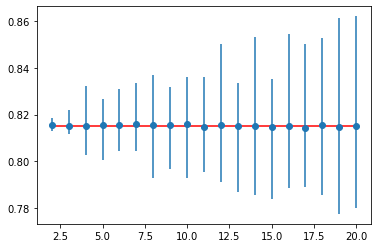

In [6]:
## convert dataframe to array using stabf as target column
df_arr = df.to_numpy()
X = df_arr[:,:-2]
y = df_arr[:,-1]

## Test train split of the complete dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## tuning hyperparaneters for logistic regression model

model = LogisticRegression(random_state=0).fit(X, y)

y_pred = model.predict(X_test)

## check for correct value of k
scores_ideal = cross_val_score(model, X, y, scoring='accuracy', cv=LeaveOneOut(), n_jobs=-1)
print('Accuracy: %.3f (%.3f,%.3f)' % (np.mean(scores_ideal), scores_ideal.min(),scores_ideal.max()))
ideal_mean = np.mean(scores_ideal)
ideal_min = scores_ideal.min()
ideal_max = scores_ideal.max()

# range to test
folds = range(2,21)
# record mean and min/max of each set of results
means, mins, maxs = list(),list(),list()
# evaluating each k value
for k in folds:
    cv = KFold(n_splits=k, shuffle=True, random_state=1)
# evaluating k values
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    k_mean = np.mean(scores)
    k_min = scores.min()
    k_max = scores.max()
# report performance
    print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
    means.append(k_mean)
    mins.append(k_mean - k_min)
    maxs.append(k_max - k_mean)
# line plot of k mean values with min/max error bars
plt.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
# plotting the ideal case
plt.plot(folds, [ideal_mean for _ in range(len(folds))], color='r')
plt.show()

In [7]:
#ideal value for k is 2

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01, 0.001]
# grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = KFold(n_splits=2, random_state=1, shuffle=True)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# print results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.816000 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.816000 (0.001800) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.816000 (0.001800) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.815800 (0.001600) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.815800 (0.002000) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.815800 (0.002000) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.815900 (0.002100) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.815700 (0.002900) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.815700 (0.002900) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.814200 (0.002400) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.811000 (0.003400) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.811000 (0.003400) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.802800 (0.003400) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.779500 (0.005100) wit

In [8]:
## model using tuned hyperparameters
clf = LogisticRegression(random_state=0,C= 100, penalty= 'l2', solver =  'liblinear').fit(X_train, y_train)

y_pred = clf.predict(X_test)

## evaluation using test train split
print(classification_report(y_test, y_pred))

## confusion matrix
confusionMatrix = confusion_matrix(y_test, y_pred)
print(confusionMatrix)

# kappa_score = kappaScore(confusionMatrix[0][0],confusionMatrix[0][1],confusionMatrix[1][0],confusionMatrix[1][1])
# print(kappa_score)

## Kappa statistic
print("\n\nkappa score is:")
print(cohen_kappa_score(y_test, y_pred))

              precision    recall  f1-score   support

      stable       0.74      0.72      0.73       693
    unstable       0.85      0.87      0.86      1307

    accuracy                           0.82      2000
   macro avg       0.80      0.79      0.80      2000
weighted avg       0.81      0.82      0.82      2000

[[ 498  195]
 [ 173 1134]]


kappa score is:
0.5906549187594619


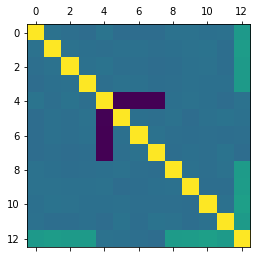

In [9]:
plt.matshow(df.corr())
plt.show()

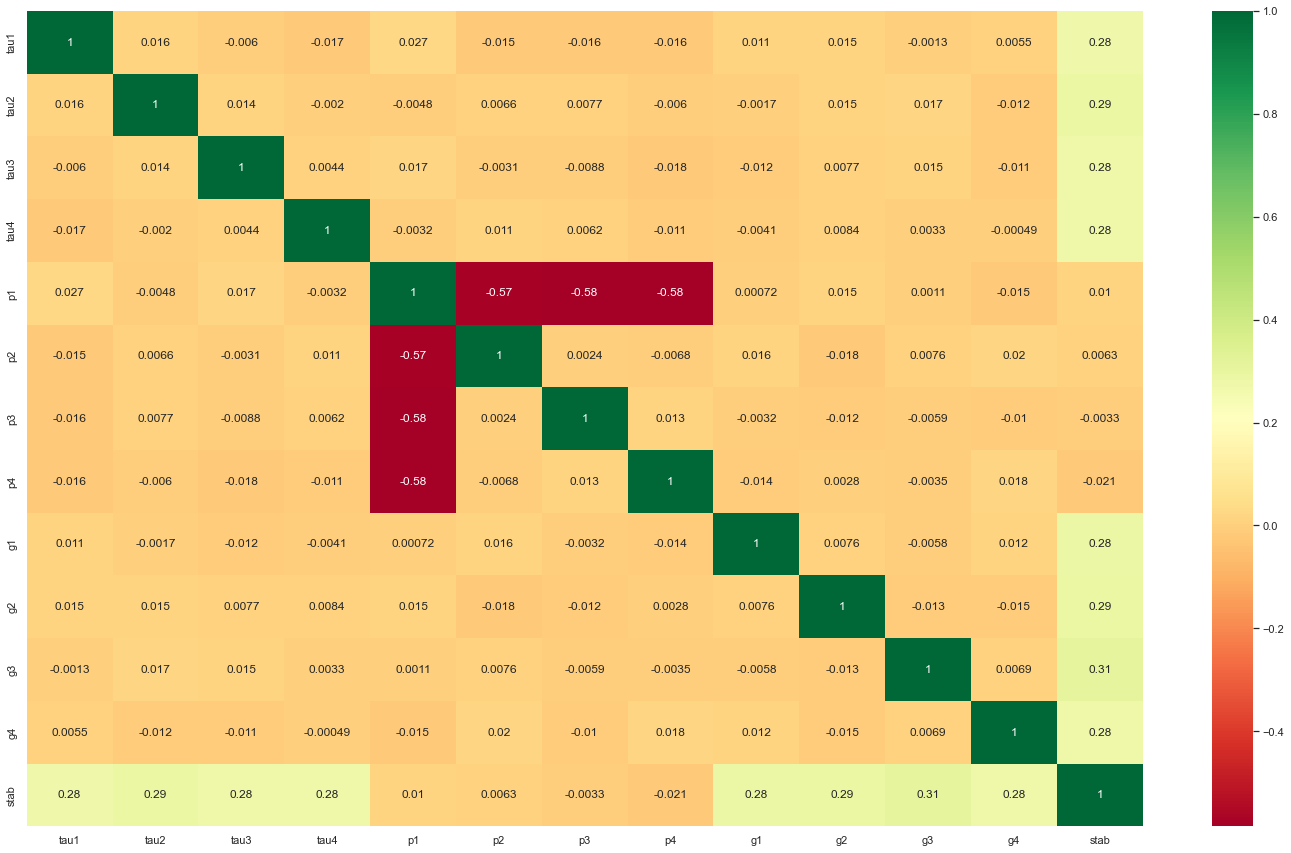

In [10]:
plt.figure(figsize=(25,15))
sns.set(style="whitegrid")
sns.heatmap(df.corr(method='pearson'),annot=True, cmap='RdYlGn')
plt.show()

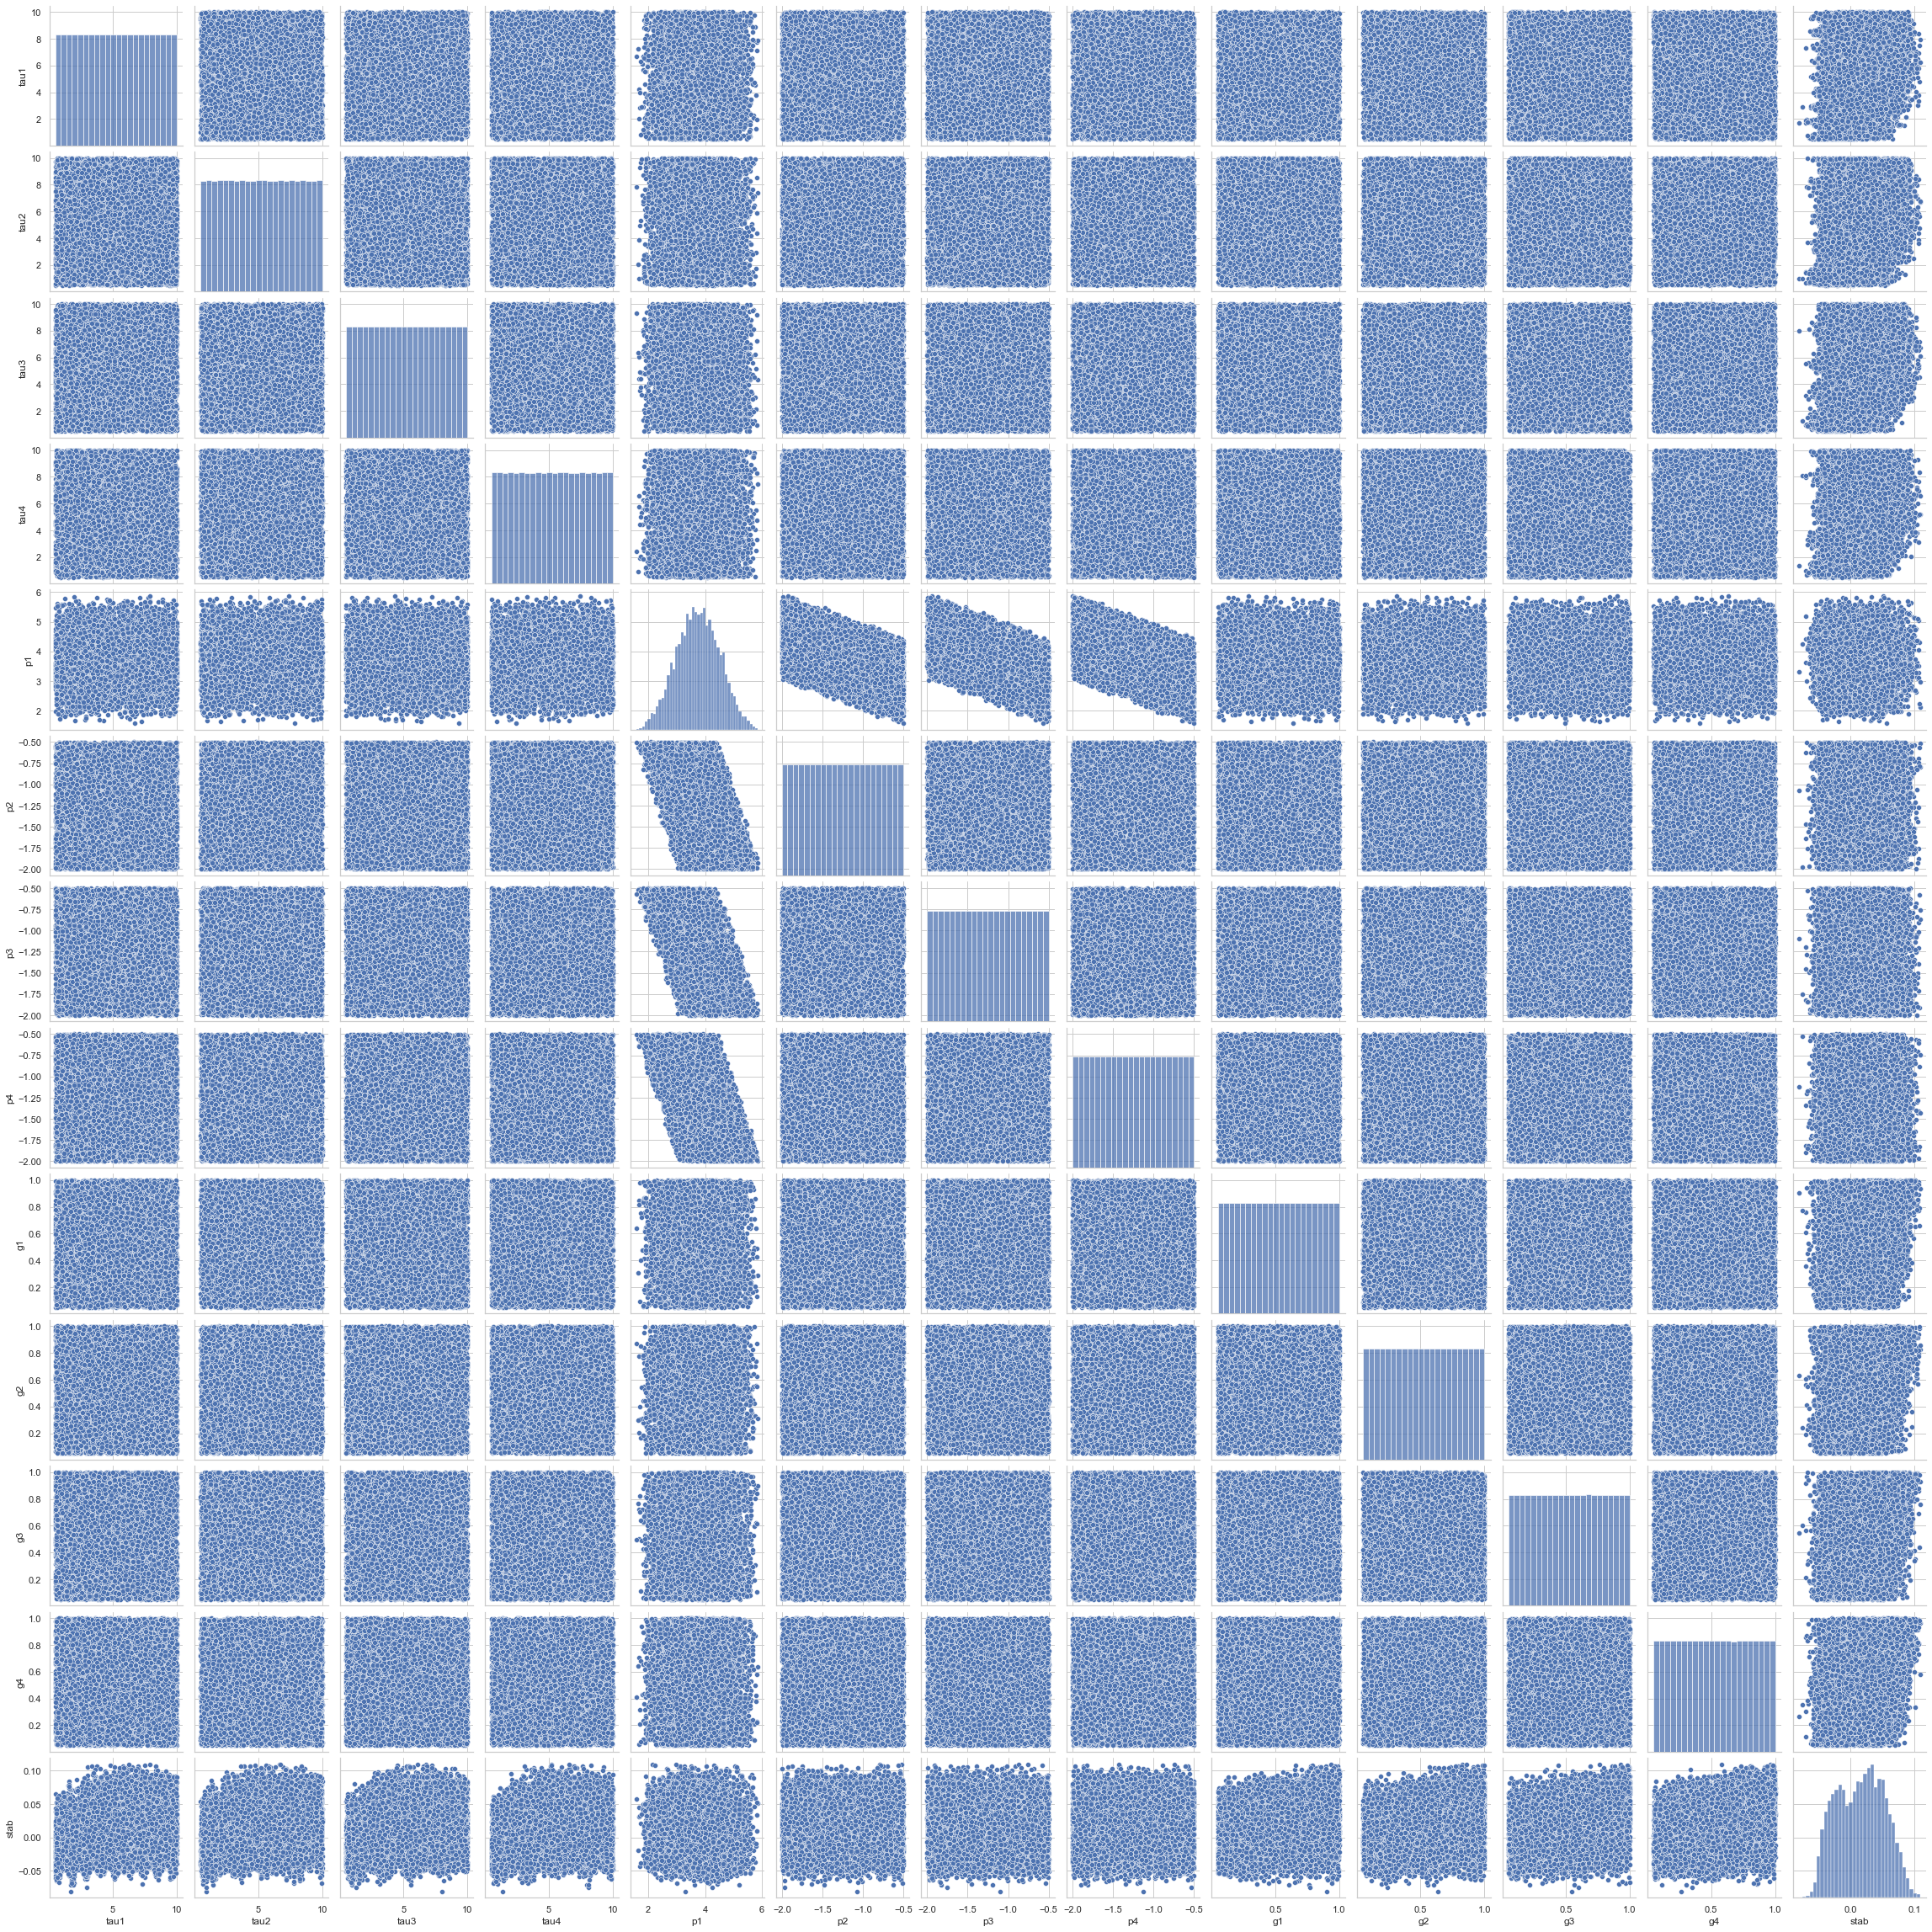

In [11]:
sns.pairplot(df)
plt.show()

In [12]:
## oversampling using SMOTE

## Splitting data unto train and test

from sklearn.preprocessing import MinMaxScaler  

# Normalize the features for PCA
minmax = MinMaxScaler()
x_train_norm = minmax.fit_transform(X_train)
# x_test_norm = minmax.transform(X_test)

## PCA

pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_norm)
# x_test_pca = pca.transform(x_test_norm)
x_train_pca.shape

(8000, 2)

Counter({'unstable': 5073, 'stable': 2927})


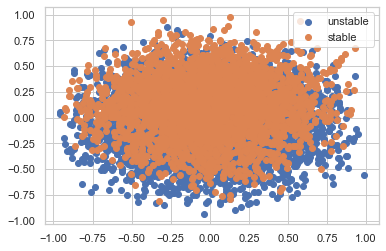

In [13]:
## plot of data before SMOTE
counter = Counter(y_train)
print(counter)
for label, _ in counter.items():
    row_ix = where(y_train == label)[0]
    plt.scatter(x_train_pca[row_ix,0], x_train_pca[row_ix,1], label=str(label))
plt.legend()
plt.show()

In [14]:
## Apply SMOTE to dataset
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X_train, y_train)

counter = Counter(y_smote)
print(counter)

Counter({'unstable': 5073, 'stable': 5073})


In [15]:
# Normalize the features for PCA
minmax = MinMaxScaler()
x_train_norm = minmax.fit_transform(X_smote)
# x_test_norm = minmax.transform(X_test)

## PCA

pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_norm)
# x_test_pca = pca.transform(x_test_norm)
x_train_pca.shape

(10146, 2)

Counter({'unstable': 5073, 'stable': 5073})


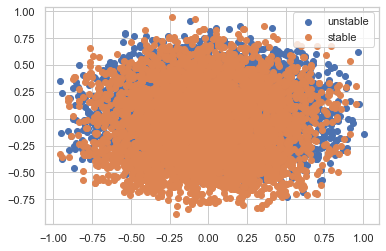

In [16]:
## Plot after SMOTE
counter = Counter(y_smote)
print(counter)
for label, _ in counter.items():
    row_ix = where(y_smote == label)[0]
    plt.scatter(x_train_pca[row_ix,0], x_train_pca[row_ix,1], label=str(label))
plt.legend()
plt.show()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.20, random_state=42)


model = LogisticRegression(random_state=0).fit(X_smote, y_smote)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


conMatrix = confusion_matrix(y_test, y_pred)
print(conMatrix)

## Kappa statistic
print("\n\n kappa score is:")
print(cohen_kappa_score(y_test, y_pred))

              precision    recall  f1-score   support

      stable       0.81      0.80      0.81      1035
    unstable       0.80      0.80      0.80       995

    accuracy                           0.80      2030
   macro avg       0.80      0.80      0.80      2030
weighted avg       0.80      0.80      0.80      2030

[[832 203]
 [197 798]]


 kappa score is:
0.6058041934278044


In [18]:
# y_pred = [1 if i == 'stable' else 'unstable' for i in y_pred]
# y_test = [1 if i == 'stable' else 'unstable' for i in y_test]


y_pred = np.where(y_pred == 'stable', 1, 0)
y_test = np.where(y_test == 'stable', 1, 0)


y_test

array([0, 0, 1, ..., 0, 0, 1])

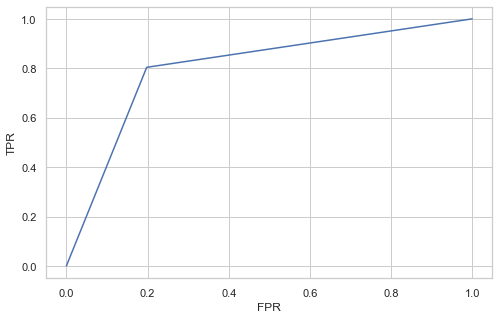

In [19]:
fprl,tprl,_ = roc_curve(y_test,y_pred)
auc = roc_auc_score(y_test,y_pred)
#print(auc)
plt.figure(figsize=(8,5))
plt.plot(fprl,tprl, label = "AUC = "+str(auc))

plt.xlabel("FPR")
plt.ylabel("TPR");

In [20]:
roc_auc_score(y_test,y_pred)

0.8029373922753866

# Penalized Linear Regression

In [21]:
# !pip install imblearn
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import math

smart_grid = pd.read_csv('Data_for_UCI_named.csv')
smart_grid.head()

tau1      tau2      tau3      tau4        p1        p2        p3  \
0  2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1  9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2  8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3  0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4  3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   

         p4        g1        g2        g3        g4      stab     stabf  
0 -1.723086  0.650456  0.859578  0.887445  0.958034  0.055347  unstable  
1 -1.255012  0.413441  0.862414  0.562139  0.781760 -0.005957    stable  
2 -0.920492  0.163041  0.766689  0.839444  0.109853  0.003471  unstable  
3 -0.997374  0.446209  0.976744  0.929381  0.362718  0.028871  unstable  
4 -0.554305  0.797110  0.455450  0.656947  0.820923  0.049860  unstable

#### stab is our target variable and stabf is the target categorical variable
#### stab < 0 is stable and stab > 0 is unstable

## Train-Test Split & K-Fold cross validation

In [22]:
from sklearn.model_selection import train_test_split 

smart_grid_x = smart_grid.drop(columns=['stab','stabf'])
smart_grid_y_stab = smart_grid['stab']       ## regression 
smart_grid_y_stabf = smart_grid['stabf'].replace(['stable','unstable'],[1,0])       ## classification

In [23]:
## train-test split for stab

x_train, x_test, y_train, y_test = train_test_split(smart_grid_x, smart_grid_y_stab,train_size=0.8, random_state=7)

x_train_stabf, x_test_stabf, y_train_stabf, y_test_stabf = train_test_split(smart_grid_x, smart_grid_y_stabf,train_size=0.8, 
                                                                            random_state=7)

x_train.shape, x_test.shape, y_train.shape, y_test.shape 

((8000, 12), (2000, 12), (8000,), (2000,))

# Penalised Linear Regression
### - To avoid having large weights, this model  minimizes/ penalizes the weights to avoid overfitting.
![Capture.JPG](attachment:Capture.JPG)

[Capture.JPG](attachment:Capture.JPG)

In [24]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut

def k_value_graph(clf,X,y):
    ## check for correct value of k
    scores_ideal = cross_val_score(clf, X, y, scoring='r2', cv=LeaveOneOut(), n_jobs=-1)
    print('r2: %.5f (%.3f,%.3f)' % (np.mean(scores_ideal), scores_ideal.min(),scores_ideal.max()))
    ideal_mean = np.mean(scores_ideal)
    ideal_min = scores_ideal.min()
    ideal_max = scores_ideal.max()

    # range to test
    folds = range(2,15)
    # record mean and min/max of each set of results
    means, mins, maxs = list(),list(),list()
    # evaluating each k value
    for k in folds:
        cv = KFold(n_splits=k, shuffle=True, random_state=1)
        # evaluating k values
        scores = cross_val_score(clf, X, y, scoring='r2', cv=cv, n_jobs=-1)
        k_mean = np.mean(scores)
        k_min = scores.min()
        k_max = scores.max()
        # report performance
        print('> folds=%d, r2=%.5f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
        means.append(k_mean)
        mins.append(k_mean - k_min)
        maxs.append(k_max - k_mean)
#     # line plot of k mean values with min/max error bars
#     plt.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
#     # plotting the ideal case
#     plt.plot(folds, [ideal_mean for _ in range(len(folds))], color='r')
#     plt.show()

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

model_linear = LinearRegression()
k_value_graph(model_linear,smart_grid_x,smart_grid_y_stab)

r2: nan (nan,nan)
> folds=2, r2=0.64469 (0.638,0.651)
> folds=3, r2=0.64607 (0.636,0.655)
> folds=4, r2=0.64592 (0.633,0.661)
> folds=5, r2=0.64576 (0.630,0.668)
> folds=6, r2=0.64590 (0.630,0.665)
> folds=7, r2=0.64517 (0.632,0.664)
> folds=8, r2=0.64543 (0.619,0.667)
> folds=9, r2=0.64529 (0.605,0.665)
> folds=10, r2=0.64502 (0.616,0.677)
> folds=11, r2=0.64553 (0.617,0.676)
> folds=12, r2=0.64558 (0.614,0.671)
> folds=13, r2=0.64496 (0.604,0.680)
> folds=14, r2=0.64523 (0.611,0.677)


In [26]:
grid_linear = GridSearchCV(estimator=model_linear, param_grid={'fit_intercept':['True']}, n_jobs=-1,
                           cv=KFold(n_splits=3, random_state=7, shuffle=True), scoring='r2',error_score=0)
result_linear = grid_linear.fit(smart_grid_x, smart_grid_y_stab)
# summarize results
print("Best: %f using %s" % (grid_linear.best_score_, grid_linear.best_params_))
means = grid_linear.cv_results_['mean_test_score']
stds = grid_linear.cv_results_['std_test_score']
params = grid_linear.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.645795 using {'fit_intercept': 'True'}
0.645795 (0.009244) with: {'fit_intercept': 'True'}


In [27]:
## Best linear regression estimator
linear_reg = LinearRegression(fit_intercept=True).fit(x_train,y_train)
y_pred_linear = linear_reg.predict(x_test)

## converting continous to binary 
y_pred_linear_stabf = [1 if n<0 else 0 for n in y_pred_linear]

In [28]:
## Evaluations
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('Linear Regression')
print(f'Kappa Score: {cohen_kappa_score(y_test_stabf,y_pred_linear_stabf):.2f}\n')
print(f'Confusion Matrix:\n{confusion_matrix(y_test_stabf,y_pred_linear_stabf)}\n')
print(f'Classification Report:\n{classification_report(y_test_stabf,y_pred_linear_stabf)}\n')

Linear Regression
Kappa Score: 0.60

Confusion Matrix:
[[1177  120]
 [ 234  469]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1297
           1       0.80      0.67      0.73       703

    accuracy                           0.82      2000
   macro avg       0.82      0.79      0.80      2000
weighted avg       0.82      0.82      0.82      2000




Text(0.5, 1.0, 'ROC curve - Linear Regression')

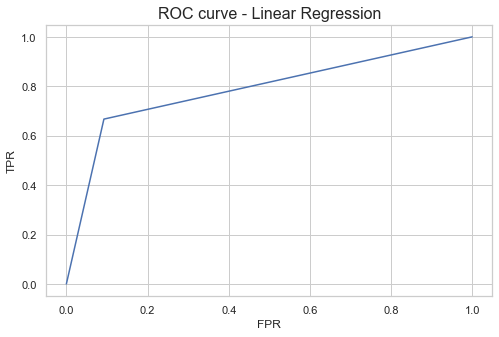

In [29]:
fprp,tprp,_ = roc_curve(y_test_stabf, y_pred_linear_stabf)
auc = roc_auc_score(y_test_stabf,y_pred_linear_stabf)

plt.figure(figsize=(8,5))
plt.plot(fprp,tprp, label = "AUC = "+str(auc))

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('ROC curve - Linear Regression', fontsize=16)

##### Ridge Regression 

In [30]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(random_state=11)
k_value_graph(ridge_model,smart_grid_x,smart_grid_y_stab)

r2: nan (nan,nan)
> folds=2, r2=0.64494 (0.638,0.652)
> folds=3, r2=0.64588 (0.636,0.655)
> folds=4, r2=0.64555 (0.632,0.661)
> folds=5, r2=0.64560 (0.630,0.668)
> folds=6, r2=0.64582 (0.630,0.664)
> folds=7, r2=0.64543 (0.633,0.665)
> folds=8, r2=0.64544 (0.619,0.667)
> folds=9, r2=0.64514 (0.606,0.666)
> folds=10, r2=0.64510 (0.615,0.677)
> folds=11, r2=0.64550 (0.617,0.675)
> folds=12, r2=0.64567 (0.614,0.670)
> folds=13, r2=0.64501 (0.605,0.680)
> folds=14, r2=0.64508 (0.612,0.676)


In [31]:
ridge_param = {'alpha':[0.01,0.05,0.15,0.25,0.35,0.45,0.5,0.75,1],
              'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'saga', 'lbfgs']}
grid_ridge = GridSearchCV(estimator=ridge_model, param_grid=ridge_param, n_jobs=-1, cv=KFold(n_splits=3, random_state=7, shuffle=True),
                          scoring='r2',error_score=0)
result_ridge = grid_ridge.fit(smart_grid_x, smart_grid_y_stab)
# summarize results
print("Best: %f using %s" % (grid_ridge.best_score_, grid_ridge.best_params_))
means = grid_ridge.cv_results_['mean_test_score']
stds = grid_ridge.cv_results_['std_test_score']
params = grid_ridge.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.645803 using {'alpha': 0.35, 'solver': 'saga'}
0.645781 (0.009400) with: {'alpha': 0.01, 'solver': 'auto'}
0.645781 (0.009400) with: {'alpha': 0.01, 'solver': 'svd'}
0.645781 (0.009400) with: {'alpha': 0.01, 'solver': 'cholesky'}
0.645746 (0.009415) with: {'alpha': 0.01, 'solver': 'lsqr'}
0.645787 (0.009403) with: {'alpha': 0.01, 'solver': 'sparse_cg'}
0.645802 (0.009417) with: {'alpha': 0.01, 'solver': 'saga'}
0.000000 (0.000000) with: {'alpha': 0.01, 'solver': 'lbfgs'}
0.645781 (0.009400) with: {'alpha': 0.05, 'solver': 'auto'}
0.645781 (0.009400) with: {'alpha': 0.05, 'solver': 'svd'}
0.645781 (0.009400) with: {'alpha': 0.05, 'solver': 'cholesky'}
0.645746 (0.009415) with: {'alpha': 0.05, 'solver': 'lsqr'}
0.645788 (0.009402) with: {'alpha': 0.05, 'solver': 'sparse_cg'}
0.645802 (0.009416) with: {'alpha': 0.05, 'solver': 'saga'}
0.000000 (0.000000) with: {'alpha': 0.05, 'solver': 'lbfgs'}
0.645781 (0.009398) with: {'alpha': 0.15, 'solver': 'auto'}
0.645781 (0.009398) with: {

C:\Users\sushm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
27 fits failed out of a total of 189.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sushm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sushm\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 1130, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "C:\Users\sushm\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 806, in fit
    raise ValueError(
ValueError: 'lbfgs' solver c

In [32]:
## Best Ridge regression estimator
ridge_reg = Ridge(alpha=0.35,solver='saga').fit(x_train,y_train)
y_pred_ridge = ridge_reg.predict(x_test)

## converting continous to binary 
y_pred_ridge_stabf = [1 if n<0 else 0 for n in y_pred_ridge]

In [33]:
## Evaluations

print('Ridge Regression- L2 norm')
print(f'Kappa Score: {cohen_kappa_score(y_test_stabf,y_pred_ridge_stabf):.2f}\n')
print(f'Confusion Matrix:\n{confusion_matrix(y_test_stabf,y_pred_ridge_stabf)}\n')
print(f'Classification Report:\n{classification_report(y_test_stabf,y_pred_ridge_stabf)}\n')

Ridge Regression- L2 norm
Kappa Score: 0.60

Confusion Matrix:
[[1178  119]
 [ 236  467]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1297
           1       0.80      0.66      0.72       703

    accuracy                           0.82      2000
   macro avg       0.82      0.79      0.80      2000
weighted avg       0.82      0.82      0.82      2000




Text(0.5, 1.0, 'ROC curve - Ridge Regression')

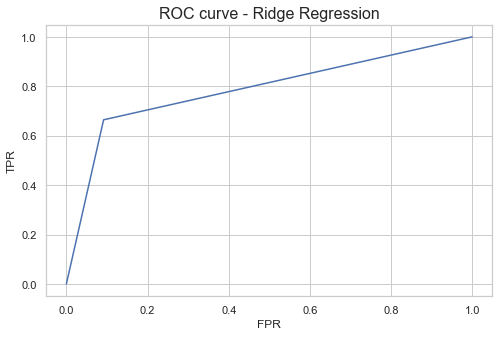

In [34]:
fprridge,tprridge,_ = roc_curve(y_test_stabf, y_pred_ridge_stabf)
auc = roc_auc_score(y_test_stabf,y_pred_ridge_stabf)

plt.figure(figsize=(8,5))
plt.plot(fprridge,tprridge, label = "AUC = "+str(auc))

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('ROC curve - Ridge Regression', fontsize=16)

### Lasso Regression 

In [35]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(random_state=11)
k_value_graph(lasso_model,smart_grid_x,smart_grid_y_stab)

r2: nan (nan,nan)
> folds=2, r2=-0.00001 (-0.000,-0.000)
> folds=3, r2=-0.00037 (-0.001,-0.000)
> folds=4, r2=-0.00053 (-0.001,-0.000)
> folds=5, r2=-0.00016 (-0.000,-0.000)
> folds=6, r2=-0.00047 (-0.002,-0.000)
> folds=7, r2=-0.00091 (-0.004,-0.000)
> folds=8, r2=-0.00064 (-0.002,-0.000)
> folds=9, r2=-0.00099 (-0.006,-0.000)
> folds=10, r2=-0.00130 (-0.005,-0.000)
> folds=11, r2=-0.00084 (-0.002,-0.000)
> folds=12, r2=-0.00105 (-0.007,-0.000)
> folds=13, r2=-0.00129 (-0.007,-0.000)
> folds=14, r2=-0.00172 (-0.011,-0.000)


In [36]:
lasso_param = {'alpha':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
              'selection':['cyclic','random']}
grid_lasso = GridSearchCV(estimator=lasso_model, param_grid=lasso_param, n_jobs=-1, cv=KFold(n_splits=3, random_state=7,shuffle=True),
                          scoring='r2',error_score=0)
result_lasso = grid_lasso.fit(smart_grid_x, smart_grid_y_stab)
# summarize results
print("Best: %f using %s" % (grid_lasso.best_score_, grid_lasso.best_params_))
means = grid_lasso.cv_results_['mean_test_score']
stds = grid_lasso.cv_results_['std_test_score']
params = grid_lasso.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.001207 using {'alpha': 0.1, 'selection': 'cyclic'}
-0.001207 (0.000839) with: {'alpha': 0.1, 'selection': 'cyclic'}
-0.001207 (0.000839) with: {'alpha': 0.1, 'selection': 'random'}
-0.001207 (0.000839) with: {'alpha': 0.2, 'selection': 'cyclic'}
-0.001207 (0.000839) with: {'alpha': 0.2, 'selection': 'random'}
-0.001207 (0.000839) with: {'alpha': 0.3, 'selection': 'cyclic'}
-0.001207 (0.000839) with: {'alpha': 0.3, 'selection': 'random'}
-0.001207 (0.000839) with: {'alpha': 0.4, 'selection': 'cyclic'}
-0.001207 (0.000839) with: {'alpha': 0.4, 'selection': 'random'}
-0.001207 (0.000839) with: {'alpha': 0.5, 'selection': 'cyclic'}
-0.001207 (0.000839) with: {'alpha': 0.5, 'selection': 'random'}
-0.001207 (0.000839) with: {'alpha': 0.6, 'selection': 'cyclic'}
-0.001207 (0.000839) with: {'alpha': 0.6, 'selection': 'random'}
-0.001207 (0.000839) with: {'alpha': 0.7, 'selection': 'cyclic'}
-0.001207 (0.000839) with: {'alpha': 0.7, 'selection': 'random'}
-0.001207 (0.000839) with: {'a

In [37]:
## Best Ridge regression estimator
lasso_reg = Lasso(alpha=0.1,selection='cyclic').fit(x_train,y_train)
y_pred_lasso = lasso_reg.predict(x_test)

## converting continous to binary 
y_pred_lasso_stabf = [1 if n<0 else 0 for n in y_pred_ridge]

In [38]:
## Evaluations

print('Lasso Regression- L1 norm')
print(f'Kappa Score: {cohen_kappa_score(y_test_stabf,y_pred_lasso_stabf):.2f}\n')
print(f'Confusion Matrix:\n{confusion_matrix(y_test_stabf,y_pred_lasso_stabf)}\n')
print(f'Classification Report:\n{classification_report(y_test_stabf,y_pred_lasso_stabf)}\n')

Lasso Regression- L1 norm
Kappa Score: 0.60

Confusion Matrix:
[[1178  119]
 [ 236  467]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1297
           1       0.80      0.66      0.72       703

    accuracy                           0.82      2000
   macro avg       0.82      0.79      0.80      2000
weighted avg       0.82      0.82      0.82      2000




Text(0.5, 1.0, 'ROC curve - Lasso Regression')

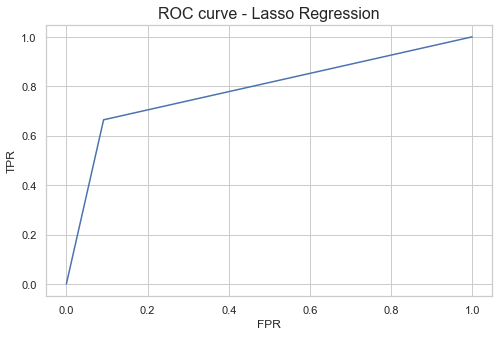

In [39]:
fprlasso,tprlasso,_ = roc_curve(y_test_stabf, y_pred_ridge_stabf)
auc = roc_auc_score(y_test_stabf,y_pred_ridge_stabf)

plt.figure(figsize=(8,5))
plt.plot(fprlasso,tprlasso, label = "AUC = "+str(auc))

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('ROC curve - Lasso Regression', fontsize=16)

# Random Forest

In [40]:
#Importing libraries

import pandas as pd
from numpy import mean
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, LeaveOneOut

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, cohen_kappa_score









In [41]:
df = pd.read_csv("Data_for_UCI_named.csv") #Importing dataset

#df.head()

In [42]:
#Splitting into target and independent variables

y = df["stab"]
X = df.drop(['stabf','stab'], axis =1)

### K Fold Cross validation

In [43]:
# Finding the value of K

# check for correct value of k
folds = range(2,21)

def evaluate_model(cv):
    
    
    model = RandomForestRegressor()
 

  # evaluate the model
    scores = cross_val_score(model, X, y, scoring= 'r2', cv=cv, n_jobs=-1)
  # return scores
    return mean(scores), scores.min(), scores.max()


for k in folds:
    
    cv = KFold(n_splits=k, shuffle=True, random_state=10)
  # record mean and min/max of each set of results
    k_mean, k_min, k_max = evaluate_model(cv)
  # report performance
    print('-> folds=%d, r2=%.5f (%.5f,%.5f)' % (k, k_mean, k_min, k_max))
    
    
#   # define the test condition
#    cv = KFold(n_splits=k, shuffle=True, random_state=10)
#   # record mean and min/max of each set of results
#   k_mean, k_min, k_max = evaluate_model(cv)
#   # report performance
#   print('-> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))

# scores_ideal = cross_val_score(clf, X, y, scoring='accuracy', cv=LeaveOneOut(), n_jobs=-1)
# print('Accuracy: %.3f (%.3f,%.3f)' % (np.mean(scores_ideal), scores_ideal.min(),scores_ideal.max()))
# ideal_mean = np.mean(scores_ideal)
# ideal_min = scores_ideal.min()
# ideal_max = scores_ideal.max()



-> folds=2, r2=0.88657 (0.88552,0.88762)
-> folds=3, r2=0.89329 (0.89132,0.89666)
-> folds=4, r2=0.89591 (0.89086,0.90133)
-> folds=5, r2=0.89777 (0.89194,0.90506)
-> folds=6, r2=0.89825 (0.89173,0.90319)
-> folds=7, r2=0.89913 (0.89203,0.90741)
-> folds=8, r2=0.89882 (0.89549,0.90370)
-> folds=9, r2=0.89909 (0.88767,0.90748)
-> folds=10, r2=0.90014 (0.89350,0.90563)
-> folds=11, r2=0.90052 (0.89030,0.90611)
-> folds=12, r2=0.90083 (0.89353,0.90681)
-> folds=13, r2=0.90086 (0.88216,0.90864)
-> folds=14, r2=0.90080 (0.89502,0.90689)
-> folds=15, r2=0.90104 (0.88820,0.91181)
-> folds=16, r2=0.90093 (0.89126,0.90649)
-> folds=17, r2=0.90073 (0.88059,0.91123)
-> folds=18, r2=0.90120 (0.88112,0.91048)
-> folds=19, r2=0.90130 (0.88571,0.91224)
-> folds=20, r2=0.90073 (0.88750,0.91025)


In [44]:


#HYPERPARAMETER TUNING

model = RandomForestRegressor()

n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2','auto']

# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv =  KFold(n_splits=14, shuffle= True, random_state=1)

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='r2',error_score=0)
grid_result = grid_search.fit(X, y)


# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    
    print("%f (%f) with: %r" % (mean, stdev, param))

C:\Users\sushm\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best: 0.902140 using {'max_features': 'auto', 'n_estimators': 1000}
0.846787 (0.006912) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.878258 (0.005766) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.882124 (0.005399) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.847085 (0.009546) with: {'max_features': 'log2', 'n_estimators': 10}
0.878448 (0.005481) with: {'max_features': 'log2', 'n_estimators': 100}
0.882332 (0.005511) with: {'max_features': 'log2', 'n_estimators': 1000}
0.879793 (0.009688) with: {'max_features': 'auto', 'n_estimators': 10}
0.900149 (0.005512) with: {'max_features': 'auto', 'n_estimators': 100}
0.902140 (0.005162) with: {'max_features': 'auto', 'n_estimators': 1000}


In [45]:
#Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Fitting the random forest regressor model

regressor = RandomForestRegressor(n_estimators= 1000 , max_features = 'auto', n_jobs= -1, random_state= 0, verbose = 0 )
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


C:\Users\sushm\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [46]:
print(y_pred)

[ 0.05014988 -0.03881481  0.06367237 ... -0.00521119 -0.00145866
  0.03043452]


In [48]:

#Since continous values are not supported in classification report, converting it to binary values.
# In our dataset negative values of result means the grid is stable i.e., 1, and the positive values means unstable or 0
y_pred1 = [1 if i < 0 else 0 for i in y_pred]
y_test1 = [1 if i < 0 else 0 for i in y_test]

In [49]:
classification = classification_report(y_test1,y_pred1)
print("classification report:")
print(classification)

confusion = confusion_matrix(y_test1,y_pred1)

print("\n confusion_matrix:")
print(confusion)

print("\n\n The kappa score obtained is:" , round(cohen_kappa_score(y_test1,y_pred1),4))

print("\n\n The Mean Squared Error obtained is:" , mean_squared_error(y_test1,y_pred1))

classification report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1272
           1       0.91      0.87      0.89       728

    accuracy                           0.92      2000
   macro avg       0.92      0.91      0.91      2000
weighted avg       0.92      0.92      0.92      2000


 confusion_matrix:
[[1208   64]
 [  98  630]]


 The kappa score obtained is: 0.8233


 The Mean Squared Error obtained is: 0.081


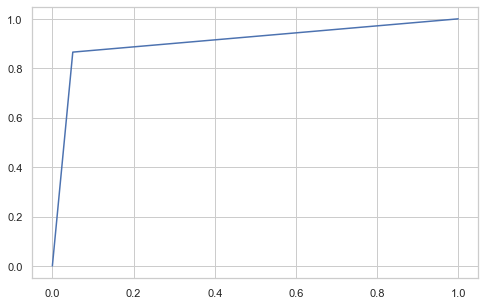

In [50]:
fpr,tpr,_ = roc_curve(y_test1,y_pred1)
auc = roc_auc_score(y_test1,y_pred1)
#print(auc)
plt.figure(figsize=(8,5))
plt.plot(fpr,tpr, label = "AUC = "+str(auc))
# plt.plot(fpr,tpr, linestyle = '--', label = 'Random Forest ROC curve')


In [51]:
roc_auc_score(y_test1,y_pred1)

0.9075350749879052

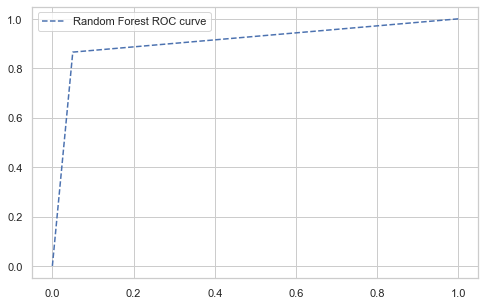

In [52]:
fpr,tpr,_ = roc_curve(y_test1,y_pred1)
plt.figure(figsize=(8,5))

plt.plot(fpr,tpr, linestyle = '--', label = 'Random Forest ROC curve')

plt.legend()


# XGBoost 

In [55]:
#!pip install xgboost

import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, roc_curve, make_scorer
from sklearn.model_selection import GridSearchCV  
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from numpy import mean
from numpy import std

In [56]:
# import data
df = pd.read_csv("Data_for_UCI_named.csv")
df.head()

tau1      tau2      tau3      tau4        p1        p2        p3  \
0  2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1  9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2  8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3  0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4  3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   

         p4        g1        g2        g3        g4      stab     stabf  
0 -1.723086  0.650456  0.859578  0.887445  0.958034  0.055347  unstable  
1 -1.255012  0.413441  0.862414  0.562139  0.781760 -0.005957    stable  
2 -0.920492  0.163041  0.766689  0.839444  0.109853  0.003471  unstable  
3 -0.997374  0.446209  0.976744  0.929381  0.362718  0.028871  unstable  
4 -0.554305  0.797110  0.455450  0.656947  0.820923  0.049860  unstable

In [57]:
df['stabf'] = df['stabf'].replace(['stable', 'unstable'], [1, 0])
df

tau1      tau2      tau3      tau4        p1        p2        p3  \
0     2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1     9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2     8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3     0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4     3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   
...        ...       ...       ...       ...       ...       ...       ...   
9995  2.930406  9.487627  2.376523  6.187797  3.343416 -0.658054 -1.449106   
9996  3.392299  1.274827  2.954947  6.894759  4.349512 -1.663661 -0.952437   
9997  2.364034  2.842030  8.776391  1.008906  4.299976 -1.380719 -0.943884   
9998  9.631511  3.994398  2.757071  7.821347  2.514755 -0.966330 -0.649915   
9999  6.530527  6.781790  4.349695  8.673138  3.492807 -1.390285 -1.532193   

            p4        g1        g2        g3        g4      stab  stabf  
0    -1.723086  0.650456  0.859578  0.887445  0.958034  0.055347      0  
1    -1.255012  0.413441  0.862414  0.562139  0.781760 -0.005957      1  
2    -0.920492  0.163041  0.766689  0.839444  0.109853  0.003471      0  
3    -0.997374  0.446209  0.976744  0.929381  0.362718  0.028871      0  
4    -0.554305  0.797110  0.455450  0.656947  0.820923  0.049860      0  
...        ...       ...       ...       ...       ...       ...    ...  
9995 -1.236256  0.601709  0.779642  0.813512  0.608385  0.023892      0  
9996 -1.733414  0.502079  0.567242  0.285880  0.366120 -0.025803      1  
9997 -1.975373  0.487838  0.986505  0.149286  0.145984 -0.031810      1  
9998 -0.898510  0.365246  0.587558  0.889118  0.818391  0.037789      0  
9999 -0.570329  0.073056  0.505441  0.378761  0.942631  0.045263      0  

[10000 rows x 14 columns]

In [58]:
X = df.iloc[:,:12]
y = df['stabf']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X_train.shape, y_train.shape

((8000, 12), (8000,))

In [60]:
# xgb model
xgb.XGBClassifier().get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [61]:
# XGB classifier
xgb_clf = xgb.XGBClassifier()

# # Fit
# xgb_clf.fit(X_train, y_train)

# # Predict
# y_pred = xgb_clf.predict(X_test)

# # Score
# accuracy_score(y_test, y_pred)

## K Fold cross validation

> folds=2, accuracy=0.937 (0.936,0.938)
> folds=3, accuracy=0.944 (0.939,0.948)
> folds=4, accuracy=0.946 (0.941,0.951)
> folds=5, accuracy=0.947 (0.940,0.956)
> folds=6, accuracy=0.947 (0.939,0.956)
> folds=7, accuracy=0.950 (0.943,0.961)
> folds=8, accuracy=0.950 (0.942,0.961)
> folds=9, accuracy=0.945 (0.934,0.953)
> folds=10, accuracy=0.951 (0.944,0.965)
> folds=11, accuracy=0.949 (0.936,0.970)
> folds=12, accuracy=0.948 (0.935,0.969)
> folds=13, accuracy=0.949 (0.938,0.966)
> folds=14, accuracy=0.951 (0.931,0.966)
> folds=15, accuracy=0.951 (0.939,0.964)
> folds=16, accuracy=0.948 (0.934,0.965)
> folds=17, accuracy=0.950 (0.935,0.964)
> folds=18, accuracy=0.950 (0.928,0.964)
> folds=19, accuracy=0.953 (0.937,0.966)
> folds=20, accuracy=0.950 (0.934,0.974)


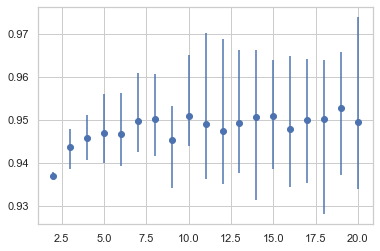

In [62]:
# range to test
folds = range(2,21)
# record mean and min/max of each set of results
means, mins, maxs = list(),list(),list()
# evaluating each k value
for k in folds:
    cv = KFold(n_splits=k, shuffle=True, random_state=1)
# evaluating k values
    scores = cross_val_score(xgb_clf, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    k_mean = np.mean(scores)
    k_min = scores.min()
    k_max = scores.max()
# report performance
    print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
    means.append(k_mean)
    mins.append(k_mean - k_min)
    maxs.append(k_max - k_mean)
# line plot of k mean values with min/max error bars
plt.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
# plotting the ideal case
plt.show()

In [63]:
#HYPERPARAMETER TUNING

learning_rate_list = [0.02, 0.05, 0.1]
max_depth_list = [2, 3, 5]
n_estimators_list = [1000, 2000, 3000]

params_dict = {"learning_rate": learning_rate_list, "max_depth": max_depth_list, "n_estimators": n_estimators_list}

num_combinations = 1
for p in params_dict.values(): num_combinations *= len(p)

print("Total number of hyperparameters combinations:",num_combinations)  
params_dict

Total number of hyperparameters combinations: 27


{'learning_rate': [0.02, 0.05, 0.1],
 'max_depth': [2, 3, 5],
 'n_estimators': [1000, 2000, 3000]}

In [65]:
def model_roc_auc_score(model, X, y): return roc_auc_score(y, model.predict(X))

model_xgboost_hp_tune = GridSearchCV(estimator = xgb.XGBClassifier(subsample=0.5,
                                                                  colsample_bytree=0.25,
                                                                  eval_metric='auc',
                                                                  use_label_encoder=False),
                                param_grid = params_dict,
                                cv = KFold(n_splits=10, random_state=1, shuffle=True),
                                scoring = model_roc_auc_score,
                                return_train_score = True,
                                verbose = 4)

model_xgboost_hp_tune.fit(X_train, y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits
[CV 1/10] END learning_rate=0.02, max_depth=2, n_estimators=1000;, score=(train=0.895, test=0.862) total time=   1.1s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/10] END learning_rate=0.02, max_depth=2, n_estimators=1000;, score=(train=0.895, test=0.853) total time=   1.0s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/10] END learning_rate=0.02, max_depth=2, n_estimators=1000;, score=(train=0.891, test=0.889) total time=   0.9s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/10] END learning_rate=0.02, max_depth=2, n_estimators=1000;, score=(train=0.893, test=0.883) total time=   1.0s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/10] END learning_rate=0.02, max_depth=2, n_estimators=1000;, score=(train=0.892, test=0.871) total time=   1.0s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 6/10] END learning_rate=0.02, max_depth=2, n_estimators=1000;, score=(train=0.893, test=0.879) total time=   1.1s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 7/10] END learning_rate=0.02, max_depth=2, n_estimators=1000;, score=(train=0.893, test=0.890) total time=   1.0s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 8/10] END learning_rate=0.02, max_depth=2, n_estimators=1000;, score=(train=0.892, test=0.879) total time=   0.9s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 9/10] END learning_rate=0.02, max_depth=2, n_estimators=1000;, score=(train=0.898, test=0.874) total time=   0.9s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 10/10] END learning_rate=0.02, max_depth=2, n_estimators=1000;, score=(train=0.896, test=0.866) total time=   0.9s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/10] END learning_rate=0.02, max_depth=2, n_estimators=2000;, score=(train=0.926, test=0.880) total time=   2.1s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/10] END learning_rate=0.02, max_depth=2, n_estimators=2000;, score=(train=0.928, test=0.876) total time=   2.1s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/10] END learning_rate=0.02, max_depth=2, n_estimators=2000;, score=(train=0.925, test=0.905) total time=   2.1s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/10] END learning_rate=0.02, max_depth=2, n_estimators=2000;, score=(train=0.925, test=0.901) total time=   2.3s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/10] END learning_rate=0.02, max_depth=2, n_estimators=2000;, score=(train=0.921, test=0.889) total time=   2.2s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 6/10] END learning_rate=0.02, max_depth=2, n_estimators=2000;, score=(train=0.923, test=0.895) total time=   2.2s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 7/10] END learning_rate=0.02, max_depth=2, n_estimators=2000;, score=(train=0.925, test=0.906) total time=   2.3s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 8/10] END learning_rate=0.02, max_depth=2, n_estimators=2000;, score=(train=0.922, test=0.887) total time=   2.1s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 9/10] END learning_rate=0.02, max_depth=2, n_estimators=2000;, score=(train=0.927, test=0.891) total time=   2.1s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 10/10] END learning_rate=0.02, max_depth=2, n_estimators=2000;, score=(train=0.925, test=0.888) total time=   2.0s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/10] END learning_rate=0.02, max_depth=2, n_estimators=3000;, score=(train=0.942, test=0.890) total time=   3.2s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/10] END learning_rate=0.02, max_depth=2, n_estimators=3000;, score=(train=0.946, test=0.883) total time=   3.3s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/10] END learning_rate=0.02, max_depth=2, n_estimators=3000;, score=(train=0.941, test=0.911) total time=   3.2s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/10] END learning_rate=0.02, max_depth=2, n_estimators=3000;, score=(train=0.941, test=0.907) total time=   3.2s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/10] END learning_rate=0.02, max_depth=2, n_estimators=3000;, score=(train=0.941, test=0.897) total time=   3.2s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 6/10] END learning_rate=0.02, max_depth=2, n_estimators=3000;, score=(train=0.945, test=0.903) total time=   3.2s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 7/10] END learning_rate=0.02, max_depth=2, n_estimators=3000;, score=(train=0.941, test=0.910) total time=   3.2s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 8/10] END learning_rate=0.02, max_depth=2, n_estimators=3000;, score=(train=0.942, test=0.900) total time=   3.2s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 9/10] END learning_rate=0.02, max_depth=2, n_estimators=3000;, score=(train=0.943, test=0.902) total time=   3.2s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 10/10] END learning_rate=0.02, max_depth=2, n_estimators=3000;, score=(train=0.944, test=0.895) total time=   3.2s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/10] END learning_rate=0.02, max_depth=3, n_estimators=1000;, score=(train=0.934, test=0.881) total time=   1.2s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/10] END learning_rate=0.02, max_depth=3, n_estimators=1000;, score=(train=0.935, test=0.877) total time=   1.3s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/10] END learning_rate=0.02, max_depth=3, n_estimators=1000;, score=(train=0.932, test=0.906) total time=   1.3s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/10] END learning_rate=0.02, max_depth=3, n_estimators=1000;, score=(train=0.930, test=0.898) total time=   1.3s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/10] END learning_rate=0.02, max_depth=3, n_estimators=1000;, score=(train=0.930, test=0.893) total time=   1.2s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 6/10] END learning_rate=0.02, max_depth=3, n_estimators=1000;, score=(train=0.931, test=0.893) total time=   1.2s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 7/10] END learning_rate=0.02, max_depth=3, n_estimators=1000;, score=(train=0.932, test=0.901) total time=   1.2s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 8/10] END learning_rate=0.02, max_depth=3, n_estimators=1000;, score=(train=0.931, test=0.895) total time=   1.3s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 9/10] END learning_rate=0.02, max_depth=3, n_estimators=1000;, score=(train=0.933, test=0.890) total time=   1.3s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 10/10] END learning_rate=0.02, max_depth=3, n_estimators=1000;, score=(train=0.932, test=0.887) total time=   1.3s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/10] END learning_rate=0.02, max_depth=3, n_estimators=2000;, score=(train=0.967, test=0.897) total time=   2.6s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/10] END learning_rate=0.02, max_depth=3, n_estimators=2000;, score=(train=0.968, test=0.893) total time=   2.6s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/10] END learning_rate=0.02, max_depth=3, n_estimators=2000;, score=(train=0.965, test=0.919) total time=   2.6s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/10] END learning_rate=0.02, max_depth=3, n_estimators=2000;, score=(train=0.967, test=0.908) total time=   2.6s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/10] END learning_rate=0.02, max_depth=3, n_estimators=2000;, score=(train=0.967, test=0.911) total time=   2.6s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 6/10] END learning_rate=0.02, max_depth=3, n_estimators=2000;, score=(train=0.966, test=0.919) total time=   2.7s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 7/10] END learning_rate=0.02, max_depth=3, n_estimators=2000;, score=(train=0.967, test=0.917) total time=   2.6s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 8/10] END learning_rate=0.02, max_depth=3, n_estimators=2000;, score=(train=0.968, test=0.914) total time=   2.6s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 9/10] END learning_rate=0.02, max_depth=3, n_estimators=2000;, score=(train=0.966, test=0.916) total time=   2.5s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 10/10] END learning_rate=0.02, max_depth=3, n_estimators=2000;, score=(train=0.964, test=0.906) total time=   2.8s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/10] END learning_rate=0.02, max_depth=3, n_estimators=3000;, score=(train=0.984, test=0.903) total time=   4.3s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/10] END learning_rate=0.02, max_depth=3, n_estimators=3000;, score=(train=0.983, test=0.904) total time=   3.7s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/10] END learning_rate=0.02, max_depth=3, n_estimators=3000;, score=(train=0.983, test=0.928) total time=   3.7s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/10] END learning_rate=0.02, max_depth=3, n_estimators=3000;, score=(train=0.984, test=0.916) total time=   4.0s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/10] END learning_rate=0.02, max_depth=3, n_estimators=3000;, score=(train=0.982, test=0.921) total time=   4.2s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 6/10] END learning_rate=0.02, max_depth=3, n_estimators=3000;, score=(train=0.984, test=0.910) total time=   4.0s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 7/10] END learning_rate=0.02, max_depth=3, n_estimators=3000;, score=(train=0.985, test=0.924) total time=   3.9s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 8/10] END learning_rate=0.02, max_depth=3, n_estimators=3000;, score=(train=0.982, test=0.919) total time=   4.0s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 9/10] END learning_rate=0.02, max_depth=3, n_estimators=3000;, score=(train=0.981, test=0.928) total time=   3.9s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 10/10] END learning_rate=0.02, max_depth=3, n_estimators=3000;, score=(train=0.983, test=0.903) total time=   4.0s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/10] END learning_rate=0.02, max_depth=5, n_estimators=1000;, score=(train=0.986, test=0.878) total time=   1.8s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/10] END learning_rate=0.02, max_depth=5, n_estimators=1000;, score=(train=0.985, test=0.876) total time=   1.8s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/10] END learning_rate=0.02, max_depth=5, n_estimators=1000;, score=(train=0.986, test=0.903) total time=   1.9s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/10] END learning_rate=0.02, max_depth=5, n_estimators=1000;, score=(train=0.986, test=0.898) total time=   1.8s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/10] END learning_rate=0.02, max_depth=5, n_estimators=1000;, score=(train=0.985, test=0.899) total time=   1.8s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 6/10] END learning_rate=0.02, max_depth=5, n_estimators=1000;, score=(train=0.985, test=0.893) total time=   1.8s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 7/10] END learning_rate=0.02, max_depth=5, n_estimators=1000;, score=(train=0.986, test=0.898) total time=   1.9s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 8/10] END learning_rate=0.02, max_depth=5, n_estimators=1000;, score=(train=0.987, test=0.897) total time=   1.8s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 9/10] END learning_rate=0.02, max_depth=5, n_estimators=1000;, score=(train=0.984, test=0.896) total time=   1.8s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 10/10] END learning_rate=0.02, max_depth=5, n_estimators=1000;, score=(train=0.987, test=0.888) total time=   1.8s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/10] END learning_rate=0.02, max_depth=5, n_estimators=2000;, score=(train=1.000, test=0.896) total time=   3.7s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/10] END learning_rate=0.02, max_depth=5, n_estimators=2000;, score=(train=1.000, test=0.888) total time=   3.7s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/10] END learning_rate=0.02, max_depth=5, n_estimators=2000;, score=(train=1.000, test=0.919) total time=   3.9s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/10] END learning_rate=0.02, max_depth=5, n_estimators=2000;, score=(train=1.000, test=0.905) total time=   3.7s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/10] END learning_rate=0.02, max_depth=5, n_estimators=2000;, score=(train=1.000, test=0.910) total time=   3.8s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 6/10] END learning_rate=0.02, max_depth=5, n_estimators=2000;, score=(train=1.000, test=0.900) total time=   3.7s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 7/10] END learning_rate=0.02, max_depth=5, n_estimators=2000;, score=(train=1.000, test=0.910) total time=   3.7s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 8/10] END learning_rate=0.02, max_depth=5, n_estimators=2000;, score=(train=1.000, test=0.910) total time=   3.7s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 9/10] END learning_rate=0.02, max_depth=5, n_estimators=2000;, score=(train=0.999, test=0.914) total time=   3.8s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 10/10] END learning_rate=0.02, max_depth=5, n_estimators=2000;, score=(train=1.000, test=0.900) total time=   3.7s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/10] END learning_rate=0.02, max_depth=5, n_estimators=3000;, score=(train=1.000, test=0.890) total time=   5.6s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/10] END learning_rate=0.02, max_depth=5, n_estimators=3000;, score=(train=1.000, test=0.890) total time=   5.7s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/10] END learning_rate=0.02, max_depth=5, n_estimators=3000;, score=(train=1.000, test=0.924) total time=   5.6s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/10] END learning_rate=0.02, max_depth=5, n_estimators=3000;, score=(train=1.000, test=0.911) total time=   5.7s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/10] END learning_rate=0.02, max_depth=5, n_estimators=3000;, score=(train=1.000, test=0.911) total time=   5.7s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 6/10] END learning_rate=0.02, max_depth=5, n_estimators=3000;, score=(train=1.000, test=0.902) total time=   5.6s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 7/10] END learning_rate=0.02, max_depth=5, n_estimators=3000;, score=(train=1.000, test=0.916) total time=   5.6s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 8/10] END learning_rate=0.02, max_depth=5, n_estimators=3000;, score=(train=1.000, test=0.921) total time=   5.7s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 9/10] END learning_rate=0.02, max_depth=5, n_estimators=3000;, score=(train=1.000, test=0.920) total time=   6.1s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 10/10] END learning_rate=0.02, max_depth=5, n_estimators=3000;, score=(train=1.000, test=0.904) total time=   6.0s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/10] END learning_rate=0.05, max_depth=2, n_estimators=1000;, score=(train=0.935, test=0.892) total time=   1.1s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/10] END learning_rate=0.05, max_depth=2, n_estimators=1000;, score=(train=0.937, test=0.885) total time=   1.0s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/10] END learning_rate=0.05, max_depth=2, n_estimators=1000;, score=(train=0.932, test=0.901) total time=   1.0s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/10] END learning_rate=0.05, max_depth=2, n_estimators=1000;, score=(train=0.933, test=0.904) total time=   1.1s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/10] END learning_rate=0.05, max_depth=2, n_estimators=1000;, score=(train=0.931, test=0.896) total time=   1.1s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 6/10] END learning_rate=0.05, max_depth=2, n_estimators=1000;, score=(train=0.930, test=0.897) total time=   1.2s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 7/10] END learning_rate=0.05, max_depth=2, n_estimators=1000;, score=(train=0.934, test=0.907) total time=   1.1s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 8/10] END learning_rate=0.05, max_depth=2, n_estimators=1000;, score=(train=0.933, test=0.901) total time=   1.0s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 9/10] END learning_rate=0.05, max_depth=2, n_estimators=1000;, score=(train=0.937, test=0.892) total time=   1.0s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 10/10] END learning_rate=0.05, max_depth=2, n_estimators=1000;, score=(train=0.932, test=0.890) total time=   1.0s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/10] END learning_rate=0.05, max_depth=2, n_estimators=2000;, score=(train=0.964, test=0.905) total time=   2.2s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/10] END learning_rate=0.05, max_depth=2, n_estimators=2000;, score=(train=0.965, test=0.905) total time=   2.1s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/10] END learning_rate=0.05, max_depth=2, n_estimators=2000;, score=(train=0.964, test=0.922) total time=   2.1s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/10] END learning_rate=0.05, max_depth=2, n_estimators=2000;, score=(train=0.961, test=0.917) total time=   2.2s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/10] END learning_rate=0.05, max_depth=2, n_estimators=2000;, score=(train=0.964, test=0.912) total time=   2.2s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 6/10] END learning_rate=0.05, max_depth=2, n_estimators=2000;, score=(train=0.962, test=0.909) total time=   2.1s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 7/10] END learning_rate=0.05, max_depth=2, n_estimators=2000;, score=(train=0.965, test=0.917) total time=   2.1s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 8/10] END learning_rate=0.05, max_depth=2, n_estimators=2000;, score=(train=0.966, test=0.906) total time=   2.1s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 9/10] END learning_rate=0.05, max_depth=2, n_estimators=2000;, score=(train=0.965, test=0.913) total time=   2.1s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 10/10] END learning_rate=0.05, max_depth=2, n_estimators=2000;, score=(train=0.963, test=0.905) total time=   2.2s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/10] END learning_rate=0.05, max_depth=2, n_estimators=3000;, score=(train=0.980, test=0.909) total time=   3.3s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/10] END learning_rate=0.05, max_depth=2, n_estimators=3000;, score=(train=0.980, test=0.913) total time=   3.4s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/10] END learning_rate=0.05, max_depth=2, n_estimators=3000;, score=(train=0.979, test=0.932) total time=   3.4s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/10] END learning_rate=0.05, max_depth=2, n_estimators=3000;, score=(train=0.979, test=0.924) total time=   3.4s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/10] END learning_rate=0.05, max_depth=2, n_estimators=3000;, score=(train=0.980, test=0.916) total time=   3.2s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 6/10] END learning_rate=0.05, max_depth=2, n_estimators=3000;, score=(train=0.978, test=0.909) total time=   3.4s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 7/10] END learning_rate=0.05, max_depth=2, n_estimators=3000;, score=(train=0.982, test=0.921) total time=   3.3s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 8/10] END learning_rate=0.05, max_depth=2, n_estimators=3000;, score=(train=0.981, test=0.921) total time=   3.4s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 9/10] END learning_rate=0.05, max_depth=2, n_estimators=3000;, score=(train=0.979, test=0.915) total time=   3.3s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 10/10] END learning_rate=0.05, max_depth=2, n_estimators=3000;, score=(train=0.980, test=0.908) total time=   3.4s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/10] END learning_rate=0.05, max_depth=3, n_estimators=1000;, score=(train=0.976, test=0.907) total time=   1.3s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/10] END learning_rate=0.05, max_depth=3, n_estimators=1000;, score=(train=0.973, test=0.900) total time=   1.3s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/10] END learning_rate=0.05, max_depth=3, n_estimators=1000;, score=(train=0.973, test=0.926) total time=   1.3s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/10] END learning_rate=0.05, max_depth=3, n_estimators=1000;, score=(train=0.975, test=0.917) total time=   1.3s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/10] END learning_rate=0.05, max_depth=3, n_estimators=1000;, score=(train=0.973, test=0.915) total time=   1.3s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 6/10] END learning_rate=0.05, max_depth=3, n_estimators=1000;, score=(train=0.975, test=0.917) total time=   1.3s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 7/10] END learning_rate=0.05, max_depth=3, n_estimators=1000;, score=(train=0.974, test=0.920) total time=   1.3s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 8/10] END learning_rate=0.05, max_depth=3, n_estimators=1000;, score=(train=0.975, test=0.911) total time=   1.3s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 9/10] END learning_rate=0.05, max_depth=3, n_estimators=1000;, score=(train=0.973, test=0.921) total time=   1.4s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 10/10] END learning_rate=0.05, max_depth=3, n_estimators=1000;, score=(train=0.975, test=0.903) total time=   1.4s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/10] END learning_rate=0.05, max_depth=3, n_estimators=2000;, score=(train=0.996, test=0.916) total time=   2.7s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/10] END learning_rate=0.05, max_depth=3, n_estimators=2000;, score=(train=0.996, test=0.920) total time=   2.7s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/10] END learning_rate=0.05, max_depth=3, n_estimators=2000;, score=(train=0.996, test=0.933) total time=   2.7s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/10] END learning_rate=0.05, max_depth=3, n_estimators=2000;, score=(train=0.996, test=0.923) total time=   2.8s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/10] END learning_rate=0.05, max_depth=3, n_estimators=2000;, score=(train=0.997, test=0.927) total time=   2.7s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 6/10] END learning_rate=0.05, max_depth=3, n_estimators=2000;, score=(train=0.996, test=0.913) total time=   2.7s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 7/10] END learning_rate=0.05, max_depth=3, n_estimators=2000;, score=(train=0.996, test=0.921) total time=   2.8s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 8/10] END learning_rate=0.05, max_depth=3, n_estimators=2000;, score=(train=0.996, test=0.930) total time=   2.7s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 9/10] END learning_rate=0.05, max_depth=3, n_estimators=2000;, score=(train=0.996, test=0.930) total time=   2.6s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 10/10] END learning_rate=0.05, max_depth=3, n_estimators=2000;, score=(train=0.996, test=0.910) total time=   2.6s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/10] END learning_rate=0.05, max_depth=3, n_estimators=3000;, score=(train=1.000, test=0.910) total time=   4.0s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/10] END learning_rate=0.05, max_depth=3, n_estimators=3000;, score=(train=1.000, test=0.923) total time=   4.1s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/10] END learning_rate=0.05, max_depth=3, n_estimators=3000;, score=(train=1.000, test=0.942) total time=   4.1s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/10] END learning_rate=0.05, max_depth=3, n_estimators=3000;, score=(train=0.999, test=0.920) total time=   4.1s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/10] END learning_rate=0.05, max_depth=3, n_estimators=3000;, score=(train=1.000, test=0.922) total time=   4.1s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 6/10] END learning_rate=0.05, max_depth=3, n_estimators=3000;, score=(train=1.000, test=0.918) total time=   4.4s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 7/10] END learning_rate=0.05, max_depth=3, n_estimators=3000;, score=(train=0.999, test=0.919) total time=   4.2s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 8/10] END learning_rate=0.05, max_depth=3, n_estimators=3000;, score=(train=1.000, test=0.930) total time=   4.1s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 9/10] END learning_rate=0.05, max_depth=3, n_estimators=3000;, score=(train=1.000, test=0.933) total time=   4.2s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 10/10] END learning_rate=0.05, max_depth=3, n_estimators=3000;, score=(train=1.000, test=0.912) total time=   4.5s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/10] END learning_rate=0.05, max_depth=5, n_estimators=1000;, score=(train=1.000, test=0.902) total time=   2.0s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/10] END learning_rate=0.05, max_depth=5, n_estimators=1000;, score=(train=1.000, test=0.892) total time=   2.0s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/10] END learning_rate=0.05, max_depth=5, n_estimators=1000;, score=(train=1.000, test=0.918) total time=   1.9s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/10] END learning_rate=0.05, max_depth=5, n_estimators=1000;, score=(train=1.000, test=0.911) total time=   1.9s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/10] END learning_rate=0.05, max_depth=5, n_estimators=1000;, score=(train=1.000, test=0.905) total time=   1.9s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 6/10] END learning_rate=0.05, max_depth=5, n_estimators=1000;, score=(train=1.000, test=0.909) total time=   1.9s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 7/10] END learning_rate=0.05, max_depth=5, n_estimators=1000;, score=(train=1.000, test=0.913) total time=   1.9s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 8/10] END learning_rate=0.05, max_depth=5, n_estimators=1000;, score=(train=1.000, test=0.919) total time=   1.8s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 9/10] END learning_rate=0.05, max_depth=5, n_estimators=1000;, score=(train=1.000, test=0.912) total time=   1.9s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 10/10] END learning_rate=0.05, max_depth=5, n_estimators=1000;, score=(train=1.000, test=0.898) total time=   2.0s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/10] END learning_rate=0.05, max_depth=5, n_estimators=2000;, score=(train=1.000, test=0.902) total time=   3.8s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/10] END learning_rate=0.05, max_depth=5, n_estimators=2000;, score=(train=1.000, test=0.898) total time=   3.8s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/10] END learning_rate=0.05, max_depth=5, n_estimators=2000;, score=(train=1.000, test=0.930) total time=   3.9s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/10] END learning_rate=0.05, max_depth=5, n_estimators=2000;, score=(train=1.000, test=0.925) total time=   3.8s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/10] END learning_rate=0.05, max_depth=5, n_estimators=2000;, score=(train=1.000, test=0.907) total time=   3.8s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 6/10] END learning_rate=0.05, max_depth=5, n_estimators=2000;, score=(train=1.000, test=0.912) total time=   3.8s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 7/10] END learning_rate=0.05, max_depth=5, n_estimators=2000;, score=(train=1.000, test=0.920) total time=   3.8s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 8/10] END learning_rate=0.05, max_depth=5, n_estimators=2000;, score=(train=1.000, test=0.920) total time=   3.7s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 9/10] END learning_rate=0.05, max_depth=5, n_estimators=2000;, score=(train=1.000, test=0.923) total time=   3.7s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 10/10] END learning_rate=0.05, max_depth=5, n_estimators=2000;, score=(train=1.000, test=0.909) total time=   3.8s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/10] END learning_rate=0.05, max_depth=5, n_estimators=3000;, score=(train=1.000, test=0.914) total time=   5.7s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/10] END learning_rate=0.05, max_depth=5, n_estimators=3000;, score=(train=1.000, test=0.904) total time=   5.7s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/10] END learning_rate=0.05, max_depth=5, n_estimators=3000;, score=(train=1.000, test=0.930) total time=   5.7s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/10] END learning_rate=0.05, max_depth=5, n_estimators=3000;, score=(train=1.000, test=0.916) total time=   5.6s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/10] END learning_rate=0.05, max_depth=5, n_estimators=3000;, score=(train=1.000, test=0.914) total time=   5.8s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 6/10] END learning_rate=0.05, max_depth=5, n_estimators=3000;, score=(train=1.000, test=0.911) total time=   5.7s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 7/10] END learning_rate=0.05, max_depth=5, n_estimators=3000;, score=(train=1.000, test=0.921) total time=   5.7s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 8/10] END learning_rate=0.05, max_depth=5, n_estimators=3000;, score=(train=1.000, test=0.925) total time=   5.8s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 9/10] END learning_rate=0.05, max_depth=5, n_estimators=3000;, score=(train=1.000, test=0.922) total time=   5.8s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 10/10] END learning_rate=0.05, max_depth=5, n_estimators=3000;, score=(train=1.000, test=0.904) total time=   5.7s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/10] END learning_rate=0.1, max_depth=2, n_estimators=1000;, score=(train=0.964, test=0.902) total time=   1.1s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/10] END learning_rate=0.1, max_depth=2, n_estimators=1000;, score=(train=0.961, test=0.897) total time=   1.1s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/10] END learning_rate=0.1, max_depth=2, n_estimators=1000;, score=(train=0.960, test=0.916) total time=   1.1s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/10] END learning_rate=0.1, max_depth=2, n_estimators=1000;, score=(train=0.963, test=0.916) total time=   1.1s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/10] END learning_rate=0.1, max_depth=2, n_estimators=1000;, score=(train=0.962, test=0.917) total time=   1.1s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 6/10] END learning_rate=0.1, max_depth=2, n_estimators=1000;, score=(train=0.959, test=0.902) total time=   1.1s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 7/10] END learning_rate=0.1, max_depth=2, n_estimators=1000;, score=(train=0.961, test=0.909) total time=   1.1s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 8/10] END learning_rate=0.1, max_depth=2, n_estimators=1000;, score=(train=0.964, test=0.912) total time=   1.1s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 9/10] END learning_rate=0.1, max_depth=2, n_estimators=1000;, score=(train=0.963, test=0.917) total time=   1.1s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 10/10] END learning_rate=0.1, max_depth=2, n_estimators=1000;, score=(train=0.963, test=0.905) total time=   1.1s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/10] END learning_rate=0.1, max_depth=2, n_estimators=2000;, score=(train=0.989, test=0.904) total time=   2.3s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/10] END learning_rate=0.1, max_depth=2, n_estimators=2000;, score=(train=0.987, test=0.921) total time=   2.3s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/10] END learning_rate=0.1, max_depth=2, n_estimators=2000;, score=(train=0.988, test=0.935) total time=   2.2s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/10] END learning_rate=0.1, max_depth=2, n_estimators=2000;, score=(train=0.991, test=0.913) total time=   2.1s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/10] END learning_rate=0.1, max_depth=2, n_estimators=2000;, score=(train=0.988, test=0.927) total time=   2.2s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 6/10] END learning_rate=0.1, max_depth=2, n_estimators=2000;, score=(train=0.988, test=0.903) total time=   2.3s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 7/10] END learning_rate=0.1, max_depth=2, n_estimators=2000;, score=(train=0.989, test=0.918) total time=   2.3s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 8/10] END learning_rate=0.1, max_depth=2, n_estimators=2000;, score=(train=0.990, test=0.924) total time=   2.3s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 9/10] END learning_rate=0.1, max_depth=2, n_estimators=2000;, score=(train=0.988, test=0.927) total time=   2.3s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 10/10] END learning_rate=0.1, max_depth=2, n_estimators=2000;, score=(train=0.989, test=0.917) total time=   2.2s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/10] END learning_rate=0.1, max_depth=2, n_estimators=3000;, score=(train=0.997, test=0.916) total time=   3.4s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/10] END learning_rate=0.1, max_depth=2, n_estimators=3000;, score=(train=0.997, test=0.923) total time=   3.4s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/10] END learning_rate=0.1, max_depth=2, n_estimators=3000;, score=(train=0.997, test=0.942) total time=   3.4s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/10] END learning_rate=0.1, max_depth=2, n_estimators=3000;, score=(train=0.997, test=0.909) total time=   3.8s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/10] END learning_rate=0.1, max_depth=2, n_estimators=3000;, score=(train=0.997, test=0.915) total time=   3.5s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 6/10] END learning_rate=0.1, max_depth=2, n_estimators=3000;, score=(train=0.997, test=0.908) total time=   3.4s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 7/10] END learning_rate=0.1, max_depth=2, n_estimators=3000;, score=(train=0.997, test=0.916) total time=   3.4s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 8/10] END learning_rate=0.1, max_depth=2, n_estimators=3000;, score=(train=0.997, test=0.930) total time=   3.5s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 9/10] END learning_rate=0.1, max_depth=2, n_estimators=3000;, score=(train=0.997, test=0.924) total time=   3.5s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 10/10] END learning_rate=0.1, max_depth=2, n_estimators=3000;, score=(train=0.997, test=0.915) total time=   3.6s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/10] END learning_rate=0.1, max_depth=3, n_estimators=1000;, score=(train=0.996, test=0.910) total time=   1.4s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/10] END learning_rate=0.1, max_depth=3, n_estimators=1000;, score=(train=0.996, test=0.915) total time=   1.3s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/10] END learning_rate=0.1, max_depth=3, n_estimators=1000;, score=(train=0.994, test=0.935) total time=   1.3s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/10] END learning_rate=0.1, max_depth=3, n_estimators=1000;, score=(train=0.995, test=0.920) total time=   1.3s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/10] END learning_rate=0.1, max_depth=3, n_estimators=1000;, score=(train=0.996, test=0.910) total time=   1.3s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 6/10] END learning_rate=0.1, max_depth=3, n_estimators=1000;, score=(train=0.996, test=0.924) total time=   1.3s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 7/10] END learning_rate=0.1, max_depth=3, n_estimators=1000;, score=(train=0.996, test=0.927) total time=   1.4s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 8/10] END learning_rate=0.1, max_depth=3, n_estimators=1000;, score=(train=0.996, test=0.929) total time=   1.3s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 9/10] END learning_rate=0.1, max_depth=3, n_estimators=1000;, score=(train=0.995, test=0.928) total time=   1.4s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 10/10] END learning_rate=0.1, max_depth=3, n_estimators=1000;, score=(train=0.996, test=0.903) total time=   1.4s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/10] END learning_rate=0.1, max_depth=3, n_estimators=2000;, score=(train=1.000, test=0.920) total time=   2.8s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/10] END learning_rate=0.1, max_depth=3, n_estimators=2000;, score=(train=1.000, test=0.917) total time=   3.0s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/10] END learning_rate=0.1, max_depth=3, n_estimators=2000;, score=(train=1.000, test=0.938) total time=   2.9s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/10] END learning_rate=0.1, max_depth=3, n_estimators=2000;, score=(train=1.000, test=0.920) total time=   2.8s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/10] END learning_rate=0.1, max_depth=3, n_estimators=2000;, score=(train=1.000, test=0.915) total time=   2.7s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 6/10] END learning_rate=0.1, max_depth=3, n_estimators=2000;, score=(train=1.000, test=0.920) total time=   2.8s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 7/10] END learning_rate=0.1, max_depth=3, n_estimators=2000;, score=(train=1.000, test=0.924) total time=   2.8s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 8/10] END learning_rate=0.1, max_depth=3, n_estimators=2000;, score=(train=1.000, test=0.930) total time=   2.7s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 9/10] END learning_rate=0.1, max_depth=3, n_estimators=2000;, score=(train=1.000, test=0.931) total time=   2.8s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 10/10] END learning_rate=0.1, max_depth=3, n_estimators=2000;, score=(train=1.000, test=0.911) total time=   2.8s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/10] END learning_rate=0.1, max_depth=3, n_estimators=3000;, score=(train=1.000, test=0.926) total time=   4.1s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/10] END learning_rate=0.1, max_depth=3, n_estimators=3000;, score=(train=1.000, test=0.912) total time=   4.2s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/10] END learning_rate=0.1, max_depth=3, n_estimators=3000;, score=(train=1.000, test=0.937) total time=   4.1s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/10] END learning_rate=0.1, max_depth=3, n_estimators=3000;, score=(train=1.000, test=0.923) total time=   4.1s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/10] END learning_rate=0.1, max_depth=3, n_estimators=3000;, score=(train=1.000, test=0.918) total time=   4.2s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 6/10] END learning_rate=0.1, max_depth=3, n_estimators=3000;, score=(train=1.000, test=0.924) total time=   4.1s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 7/10] END learning_rate=0.1, max_depth=3, n_estimators=3000;, score=(train=1.000, test=0.923) total time=   4.2s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 8/10] END learning_rate=0.1, max_depth=3, n_estimators=3000;, score=(train=1.000, test=0.926) total time=   4.2s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 9/10] END learning_rate=0.1, max_depth=3, n_estimators=3000;, score=(train=1.000, test=0.931) total time=   4.1s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 10/10] END learning_rate=0.1, max_depth=3, n_estimators=3000;, score=(train=1.000, test=0.912) total time=   4.2s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/10] END learning_rate=0.1, max_depth=5, n_estimators=1000;, score=(train=1.000, test=0.899) total time=   1.9s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/10] END learning_rate=0.1, max_depth=5, n_estimators=1000;, score=(train=1.000, test=0.917) total time=   2.0s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/10] END learning_rate=0.1, max_depth=5, n_estimators=1000;, score=(train=1.000, test=0.937) total time=   2.1s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/10] END learning_rate=0.1, max_depth=5, n_estimators=1000;, score=(train=1.000, test=0.914) total time=   2.1s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/10] END learning_rate=0.1, max_depth=5, n_estimators=1000;, score=(train=1.000, test=0.909) total time=   1.9s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 6/10] END learning_rate=0.1, max_depth=5, n_estimators=1000;, score=(train=1.000, test=0.911) total time=   2.0s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 7/10] END learning_rate=0.1, max_depth=5, n_estimators=1000;, score=(train=1.000, test=0.903) total time=   1.9s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 8/10] END learning_rate=0.1, max_depth=5, n_estimators=1000;, score=(train=1.000, test=0.928) total time=   1.8s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 9/10] END learning_rate=0.1, max_depth=5, n_estimators=1000;, score=(train=1.000, test=0.921) total time=   1.8s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 10/10] END learning_rate=0.1, max_depth=5, n_estimators=1000;, score=(train=1.000, test=0.895) total time=   1.8s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/10] END learning_rate=0.1, max_depth=5, n_estimators=2000;, score=(train=1.000, test=0.900) total time=   3.5s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/10] END learning_rate=0.1, max_depth=5, n_estimators=2000;, score=(train=1.000, test=0.916) total time=   3.4s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/10] END learning_rate=0.1, max_depth=5, n_estimators=2000;, score=(train=1.000, test=0.937) total time=   3.6s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/10] END learning_rate=0.1, max_depth=5, n_estimators=2000;, score=(train=1.000, test=0.913) total time=   3.7s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/10] END learning_rate=0.1, max_depth=5, n_estimators=2000;, score=(train=1.000, test=0.912) total time=   3.6s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 6/10] END learning_rate=0.1, max_depth=5, n_estimators=2000;, score=(train=1.000, test=0.905) total time=   3.8s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 7/10] END learning_rate=0.1, max_depth=5, n_estimators=2000;, score=(train=1.000, test=0.909) total time=   3.6s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 8/10] END learning_rate=0.1, max_depth=5, n_estimators=2000;, score=(train=1.000, test=0.924) total time=   3.7s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 9/10] END learning_rate=0.1, max_depth=5, n_estimators=2000;, score=(train=1.000, test=0.929) total time=   3.6s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 10/10] END learning_rate=0.1, max_depth=5, n_estimators=2000;, score=(train=1.000, test=0.907) total time=   3.6s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 1/10] END learning_rate=0.1, max_depth=5, n_estimators=3000;, score=(train=1.000, test=0.917) total time=   5.3s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/10] END learning_rate=0.1, max_depth=5, n_estimators=3000;, score=(train=1.000, test=0.912) total time=   5.1s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/10] END learning_rate=0.1, max_depth=5, n_estimators=3000;, score=(train=1.000, test=0.938) total time=   5.3s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/10] END learning_rate=0.1, max_depth=5, n_estimators=3000;, score=(train=1.000, test=0.917) total time=   5.2s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/10] END learning_rate=0.1, max_depth=5, n_estimators=3000;, score=(train=1.000, test=0.916) total time=   5.3s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 6/10] END learning_rate=0.1, max_depth=5, n_estimators=3000;, score=(train=1.000, test=0.912) total time=   5.2s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 7/10] END learning_rate=0.1, max_depth=5, n_estimators=3000;, score=(train=1.000, test=0.909) total time=   5.3s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 8/10] END learning_rate=0.1, max_depth=5, n_estimators=3000;, score=(train=1.000, test=0.929) total time=   5.4s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 9/10] END learning_rate=0.1, max_depth=5, n_estimators=3000;, score=(train=1.000, test=0.931) total time=   5.4s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 10/10] END learning_rate=0.1, max_depth=5, n_estimators=3000;, score=(train=1.000, test=0.904) total time=   5.1s


C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.25,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     in...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.02, 0.05, 0.1],
                         'max_depth': [2, 3, 5],
                         'n_estimators': [1000, 2000, 3000]},
             return_train_score=True,
             scoring=<function model_roc_auc_score at 0x0000017DA14350D0>,
             verbose=4)

In [66]:
# putting above results into dataframe and sorting it by its ranking
df_cv_results = pd.DataFrame(model_xgboost_hp_tune.cv_results_)
df_cv_results = df_cv_results[['rank_test_score','mean_test_score','mean_train_score','param_learning_rate',
                               'param_max_depth','param_n_estimators']]
df_cv_results.sort_values(by='rank_test_score', inplace=True)
df_cv_results

rank_test_score  mean_test_score  mean_train_score param_learning_rate  \
23                1         0.923039          1.000000                 0.1   
14                2         0.922919          0.999695                0.05   
22                3         0.922612          0.999989                 0.1   
13                4         0.922335          0.996142                0.05   
21                5         0.920035          0.995715                 0.1   
20                6         0.919945          0.996928                 0.1   
19                7         0.918851          0.988726                 0.1   
26                8         0.918459          1.000000                 0.1   
11                9         0.916703          0.979651                0.05   
17               10         0.916085          1.000000                0.05   
5                11         0.915592          0.983008                0.02   
25               12         0.915219          1.000000                 0.1   
16               13         0.914657          1.000000                0.05   
12               14         0.913720          0.974295                0.05   
24               15         0.913405          1.000000                 0.1   
10               16         0.911109          0.963882                0.05   
4                17         0.910088          0.966475                0.02   
18               18         0.909423          0.961980                 0.1   
8                19         0.908880          1.000000                0.02   
15               20         0.907799          1.000000                0.05   
7                21         0.905206          0.999790                0.02   
2                22         0.899874          0.942583                0.02   
9                23         0.896566          0.933354                0.05   
6                24         0.892442          0.985732                0.02   
3                25         0.891959          0.931938                0.02   
1                26         0.891946          0.924751                0.02   
0                27         0.874578          0.893852                0.02   

   param_max_depth param_n_estimators  
23               3               3000  
14               3               3000  
22               3               2000  
13               3               2000  
21               3               1000  
20               2               3000  
19               2               2000  
26               5               3000  
11               2               3000  
17               5               3000  
5                3               3000  
25               5               2000  
16               5               2000  
12               3               1000  
24               5               1000  
10               2               2000  
4                3               2000  
18               2               1000  
8                5               3000  
15               5               1000  
7                5               2000  
2                2               3000  
9                2               1000  
6                5               1000  
3                3               1000  
1                2               2000  
0                2               1000

In [67]:
# we got best hyperparameter values as learning_rate = 0.1, max_depth = 3, n_estimators = 3000

Text(0.5, 1.0, 'Performance wrt # of Trees and Depth')

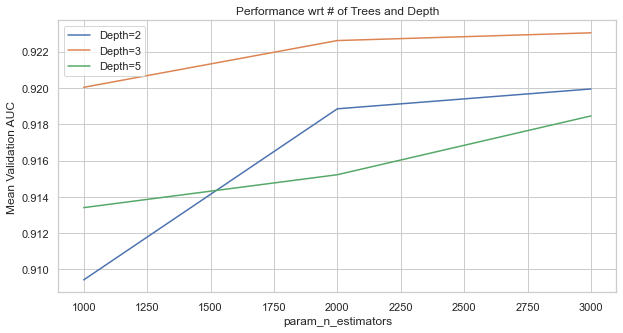

In [68]:
# sorting by n_estimators for x-axis
df_cv_results.sort_values(by='param_n_estimators', inplace=True)

# Finding values of AUC for learning rate 0.1 and different values of depth
learning_rate_d2 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.1) & (df_cv_results['param_max_depth']==2),:]
learning_rate_d3 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.1) & (df_cv_results['param_max_depth']==3),:]
learning_rate_d5 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.1) & (df_cv_results['param_max_depth']==5),:]

fig, ax = plt.subplots(figsize=(10,5))
learning_rate_d2.plot(x='param_n_estimators', y='mean_test_score', label='Depth=2', ax=ax)
learning_rate_d3.plot(x='param_n_estimators', y='mean_test_score', label='Depth=3', ax=ax)
learning_rate_d5.plot(x='param_n_estimators', y='mean_test_score', label='Depth=5', ax=ax)
plt.ylabel('Mean Validation AUC')
plt.title('Performance wrt # of Trees and Depth')

Text(0.5, 1.0, 'Performance wrt learning rate')

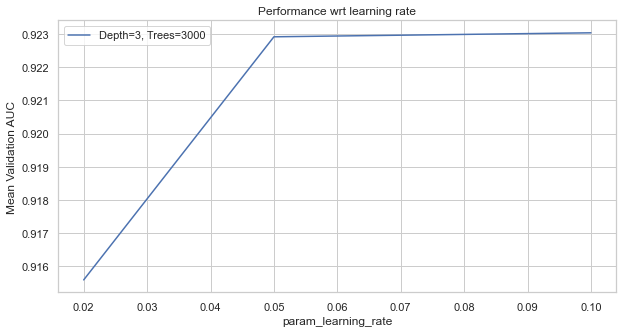

In [69]:
# sorting by learning rate for be x-axis
df_cv_results.sort_values(by='param_learning_rate', inplace=True)

# Finding values of AUC for learning rate 0.1 and different values of depth
learning_rate_d3 = df_cv_results.loc[(df_cv_results['param_n_estimators']==3000) & (df_cv_results['param_max_depth']==3),:]

fig, ax = plt.subplots(figsize=(10,5))
learning_rate_d3.plot(x='param_learning_rate', y='mean_test_score', label='Depth=3, Trees=3000', ax=ax)
plt.ylabel('Mean Validation AUC')
plt.title('Performance wrt learning rate')

In [70]:
# Final Model is defined using Best Hyper Parameters values from the above step

In [71]:
model_xgboost_final = xgb.XGBClassifier(learning_rate=0.1,
                                          max_depth=3,
                                          n_estimators=3000,
                                          subsample=0.5,
                                          colsample_bytree=0.25,
                                          eval_metric='auc',
                                          verbosity=1,
                                          use_label_encoder=False)

# Passing both training and validation dataset as we want to plot AUC for both
eval_set = [(X_train, y_train),(X_test, y_test)]

model_xgboost_final.fit(X_train,
                  y_train,
                  early_stopping_rounds=20,
                  eval_set=eval_set,
                  verbose=True)

[0]	validation_0-auc:0.64634	validation_1-auc:0.64060
[1]	validation_0-auc:0.77380	validation_1-auc:0.77593
[2]	validation_0-auc:0.77636	validation_1-auc:0.77488
[3]	validation_0-auc:0.79644	validation_1-auc:0.78946
[4]	validation_0-auc:0.81557	validation_1-auc:0.80559
[5]	validation_0-auc:0.83120	validation_1-auc:0.82079
[6]	validation_0-auc:0.82937	validation_1-auc:0.81835
[7]	validation_0-auc:0.85011	validation_1-auc:0.84031
[8]	validation_0-auc:0.87078	validation_1-auc:0.86195
[9]	validation_0-auc:0.87111	validation_1-auc:0.86475
[10]	validation_0-auc:0.90567	validation_1-auc:0.89850
[11]	validation_0-auc:0.89291	validation_1-auc:0.88608
[12]	validation_0-auc:0.89414	validation_1-auc:0.88655
[13]	validation_0-auc:0.90243	validation_1-auc:0.89418
[14]	validation_0-auc:0.92215	validation_1-auc:0.91436
[15]	validation_0-auc:0.92765	validation_1-auc:0.91818
[16]	validation_0-auc:0.92377	validation_1-auc:0.91450
[17]	validation_0-auc:0.92745	validation_1-auc:0.91677
[18]	validation_0-au

C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sushm\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[46]	validation_0-auc:0.95620	validation_1-auc:0.94464
[47]	validation_0-auc:0.95593	validation_1-auc:0.94482
[48]	validation_0-auc:0.95919	validation_1-auc:0.94794
[49]	validation_0-auc:0.95927	validation_1-auc:0.94789
[50]	validation_0-auc:0.96019	validation_1-auc:0.94844
[51]	validation_0-auc:0.96081	validation_1-auc:0.94888
[52]	validation_0-auc:0.96170	validation_1-auc:0.94929
[53]	validation_0-auc:0.96109	validation_1-auc:0.94893
[54]	validation_0-auc:0.96215	validation_1-auc:0.94979
[55]	validation_0-auc:0.96307	validation_1-auc:0.95026
[56]	validation_0-auc:0.96392	validation_1-auc:0.95123
[57]	validation_0-auc:0.96431	validation_1-auc:0.95159
[58]	validation_0-auc:0.96430	validation_1-auc:0.95145
[59]	validation_0-auc:0.96462	validation_1-auc:0.95157
[60]	validation_0-auc:0.96600	validation_1-auc:0.95296
[61]	validation_0-auc:0.96678	validation_1-auc:0.95400
[62]	validation_0-auc:0.96661	validation_1-auc:0.95379
[63]	validation_0-auc:0.96677	validation_1-auc:0.95393
[64]	valid

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.25,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=3000, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [72]:
# Let us find out the performance of the final model by calculating AUC value on training and validation sets
y_train_pred = model_xgboost_final.predict(X_train)
y_test_pred = model_xgboost_final.predict(X_test)

print("AUC Train: {:.4f}\nAUC Test: {:.4f}".format(roc_auc_score(y_train, y_train_pred),
                                                    roc_auc_score(y_test, y_test_pred)))

AUC Train: 0.9211
AUC Test: 0.8841


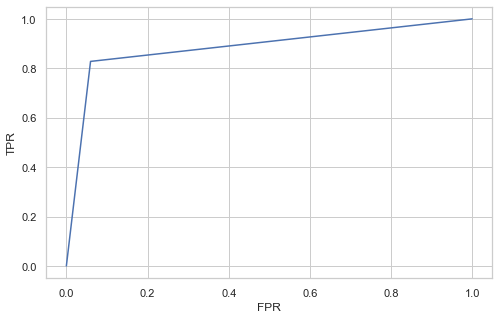

In [73]:
fprx,tprx,_ = roc_curve(y_test,y_test_pred)
auc = roc_auc_score(y_test,y_test_pred)
#print(auc)
plt.figure(figsize=(8,5))
plt.plot(fprx,tprx, label = "AUC = "+str(auc))

plt.xlabel("FPR")
plt.ylabel("TPR");

In [74]:
roc_auc_score(y_test, y_test_pred)

0.8840991731516972

In [75]:
# Let us print model performance w.r.t number of trees. 
# The first step is to get AUC values on training and validation dataset for every value of the tree. 
# We can use eval_result() function to get that. Then we can go ahead and plot it.

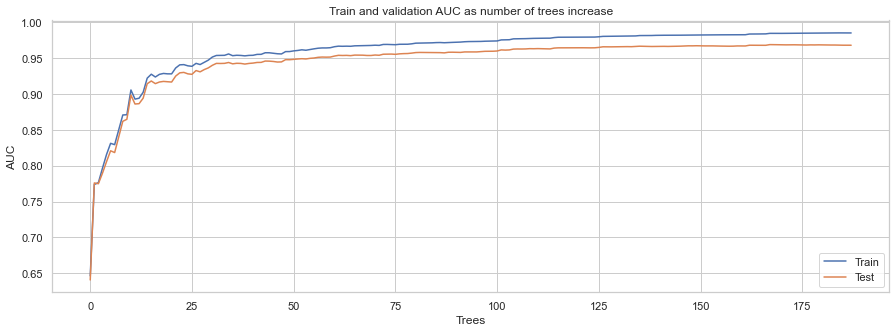

In [76]:
evaluation_results = model_xgboost_final.evals_result()

# Index into each key to find AUC values for training and validation data after each tree
train_auc_tree = evaluation_results['validation_0']['auc']
test_auc_tree = evaluation_results['validation_1']['auc']


# Plotting Section
plt.figure(figsize=(15,5))

plt.plot(train_auc_tree, label='Train')
plt.plot(test_auc_tree, label='Test')

plt.title("Train and validation AUC as number of trees increase")
plt.xlabel("Trees")
plt.ylabel("AUC")
plt.legend(loc='lower right')
plt.show()

In [77]:
# Let us also look at variable importance
variable_columns = [c for c in df.columns if c not in ['stab','stabf']]
df_var_imp = pd.DataFrame({"Variable": variable_columns,
                           "Importance": model_xgboost_final.feature_importances_}) \
                        .sort_values(by='Importance', ascending=False)
df_var_imp[:10]

Variable  Importance
1      tau2    0.132743
2      tau3    0.128369
3      tau4    0.127751
10       g3    0.122408
11       g4    0.109963
0      tau1    0.106689
9        g2    0.098180
8        g1    0.091139
4        p1    0.023133
5        p2    0.020350

In [78]:
# Score the test data

new_df = df.drop('stab', axis=1)
new_df

tau1      tau2      tau3      tau4        p1        p2        p3  \
0     2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1     9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2     8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3     0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4     3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   
...        ...       ...       ...       ...       ...       ...       ...   
9995  2.930406  9.487627  2.376523  6.187797  3.343416 -0.658054 -1.449106   
9996  3.392299  1.274827  2.954947  6.894759  4.349512 -1.663661 -0.952437   
9997  2.364034  2.842030  8.776391  1.008906  4.299976 -1.380719 -0.943884   
9998  9.631511  3.994398  2.757071  7.821347  2.514755 -0.966330 -0.649915   
9999  6.530527  6.781790  4.349695  8.673138  3.492807 -1.390285 -1.532193   

            p4        g1        g2        g3        g4  stabf  
0    -1.723086  0.650456  0.859578  0.887445  0.958034      0  
1    -1.255012  0.413441  0.862414  0.562139  0.781760      1  
2    -0.920492  0.163041  0.766689  0.839444  0.109853      0  
3    -0.997374  0.446209  0.976744  0.929381  0.362718      0  
4    -0.554305  0.797110  0.455450  0.656947  0.820923      0  
...        ...       ...       ...       ...       ...    ...  
9995 -1.236256  0.601709  0.779642  0.813512  0.608385      0  
9996 -1.733414  0.502079  0.567242  0.285880  0.366120      1  
9997 -1.975373  0.487838  0.986505  0.149286  0.145984      1  
9998 -0.898510  0.365246  0.587558  0.889118  0.818391      0  
9999 -0.570329  0.073056  0.505441  0.378761  0.942631      0  

[10000 rows x 13 columns]

In [79]:
target_df = df[['stab','stabf']].copy()
target_df

stab  stabf
0     0.055347      0
1    -0.005957      1
2     0.003471      0
3     0.028871      0
4     0.049860      0
...        ...    ...
9995  0.023892      0
9996 -0.025803      1
9997 -0.031810      1
9998  0.037789      0
9999  0.045263      0

[10000 rows x 2 columns]

In [80]:
new_df.shape, target_df.shape

((10000, 13), (10000, 2))

In [81]:
X1_test = new_df.loc[:, variable_columns]

target_df['target'] = model_xgboost_final.predict(X1_test)
target_df

stab  stabf  target
0     0.055347      0       0
1    -0.005957      1       0
2     0.003471      0       0
3     0.028871      0       0
4     0.049860      0       0
...        ...    ...     ...
9995  0.023892      0       0
9996 -0.025803      1       1
9997 -0.031810      1       1
9998  0.037789      0       0
9999  0.045263      0       0

[10000 rows x 3 columns]

In [82]:
print("The accuracy score of the model is:", accuracy_score(target_df['stabf'],target_df['target']))

confusion_ = confusion_matrix(y_test, y_test_pred)
print('\n confusion matrix:')
print(confusion_)

print("\n\n Classification Report :")
print(classification_report(y_test, y_test_pred))

## Kappa statistic
print("\n\n kappa score is:")
print('Cohen kappa_score = ',round(cohen_kappa_score(y_test, y_pred),3))

The accuracy score of the model is: 0.9265

 confusion matrix:
[[1231   78]
 [ 119  572]]


 Classification Report :
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      1309
           1       0.88      0.83      0.85       691

    accuracy                           0.90      2000
   macro avg       0.90      0.88      0.89      2000
weighted avg       0.90      0.90      0.90      2000



 kappa score is:


ValueError: Classification metrics can't handle a mix of binary and continuous targets

## Saving the model

In [83]:
fprl,tprl,_ = roc_curve(y_test,y_pred) #logistic
fpr,tpr,_ = roc_curve(y_test1,y_pred1)#rf
fprp,tprp,_ = roc_curve(y_test_stabf, y_pred_linear_stabf)#penalized
fprridge,tprridge,_ = roc_curve(y_test_stabf, y_pred_ridge_stabf) #ridge
fprlasso,tprlasso,_ = roc_curve(y_test_stabf, y_pred_ridge_stabf) #lasso
fprx,tprx,_ = roc_curve(y_test, y_test_pred) #xgboost

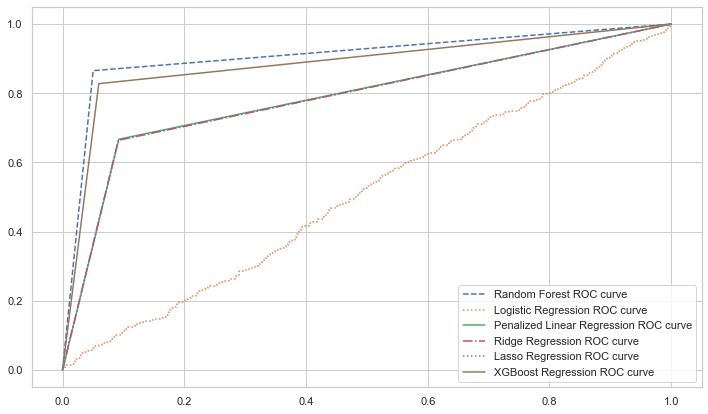

In [84]:

plt.figure(figsize=(12,7))
plt.plot(fpr,tpr, linestyle = '--', label = 'Random Forest ROC curve')
plt.plot(fprl,tprl, linestyle = 'dotted', label = 'Logistic Regression ROC curve')
plt.plot(fprp,tprp, linestyle = 'solid', label = 'Penalized Linear Regression ROC curve')
plt.plot(fprridge,tprridge, linestyle = 'dashdot', label = 'Ridge Regression ROC curve')
plt.plot(fprlasso,tprlasso, linestyle = 'dotted', label = 'Lasso Regression ROC curve')
plt.plot(fprx,tprx, linestyle = 'solid', label = 'XGBoost Regression ROC curve')
plt.legend()